start 2022-07-19 10:33:56.693809
/data/keeling/a/yulanh/c/OT_climatology/Aqua_MODIS_OTNOT_nopolygon_2002.h5
0 (180, 12, 2)
(10929,)
/data/keeling/a/yulanh/c/OT_climatology/Aqua_MODIS_OTNOT_nopolygon_2003.h5
12 (180, 12, 2)
(23940,)
/data/keeling/a/yulanh/c/OT_climatology/Aqua_MODIS_OTNOT_nopolygon_2004.h5
24 (180, 12, 2)
(21711,)
/data/keeling/a/yulanh/c/OT_climatology/Aqua_MODIS_OTNOT_nopolygon_2005.h5
36 (180, 12, 2)
(21631,)
/data/keeling/a/yulanh/c/OT_climatology/Aqua_MODIS_OTNOT_nopolygon_2006.h5
48 (180, 12, 2)
(23813,)
/data/keeling/a/yulanh/c/OT_climatology/Aqua_MODIS_OTNOT_nopolygon_2007.h5
60 (180, 12, 2)
(21808,)
/data/keeling/a/yulanh/c/OT_climatology/Aqua_MODIS_OTNOT_nopolygon_2008.h5
72 (180, 12, 2)
(24626,)
/data/keeling/a/yulanh/c/OT_climatology/Aqua_MODIS_OTNOT_nopolygon_2009.h5
84 (180, 12, 2)
(26050,)
/data/keeling/a/yulanh/c/OT_climatology/Aqua_MODIS_OTNOT_nopolygon_2010.h5
96 (180, 12, 2)
(22684,)
/data/keeling/a/yulanh/c/OT_climatology/Aqua_MODIS_OTNOT_nopolygon_2

/tmp/ipykernel_195699/462352922.py:246: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[0].grid(b=True,which='both',linestyle='--')
/tmp/ipykernel_195699/462352922.py:274: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[1].grid(b=True,which='both',linestyle='--')


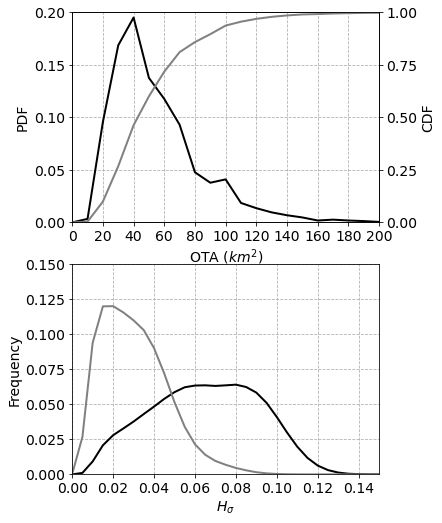

max of OT num 957.0 1910845.0
max of OT ave 276.11651611328125 12.566370010375977
max of low P OT num 1308.0 3522956.0
max of OT num 0.0 0.0


/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/tmp/ipykernel_195699/462352922.py:369: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.26, top=0.9, left=0.01, right=0.95,


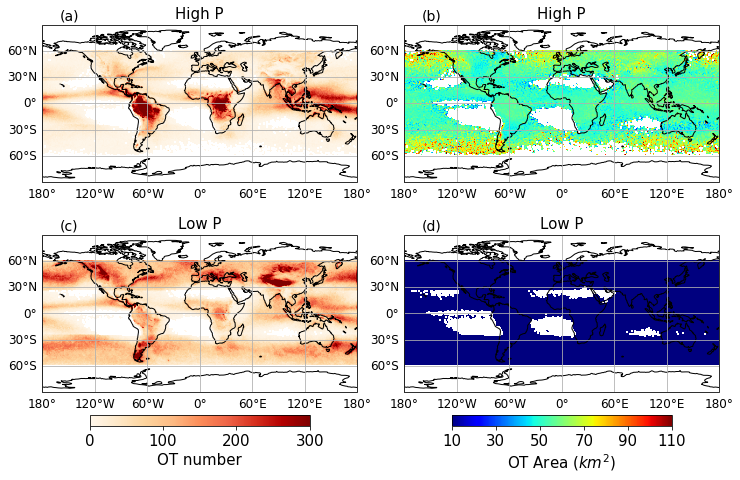

finish 2022-07-19 10:34:00.020335


In [5]:
## visualize results from post_process_OT
# import os 


import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy import stats
import glob
from pyhdf.SD import SD, SDC
import h5py
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

print('start',datetime.now())

#years=['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',\
#    '2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
years=['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013',\
       '2014','2015','2016','2017','2018','2019','2020','2021']
#years=['2002']#,'2014','2015','2016','2017','2018','2019','2020']
nyear=len(years)
#nyear=1
NOTA=100 
Nhetero=60 # bin0.005, 0-0.2
NBTD_wv=100 # bin 0.5, 0-20 K
NBTD_ci=200 # bin 1, 0-60 K
NBTD_trop=200 # bin 0.5, 0-30K
NBT=90 #150-240
Nlat=180
NBT=90

All_OT_num=np.zeros((360,180,12,2),'f')
All_OTA = np.zeros((360,180,12,2),'f')
All_OTA_poly = np.zeros((360,180,12,2),'f')
All_OT_hetero=np.zeros((360,180,12,2),'f')
All_OTA_pdf=np.zeros((Nlat,100,12,2),'i')
All_OTA_poly_pdf=np.zeros((Nlat,100,12,2),'i')
All_hetero_pdf=np.zeros((Nlat,Nhetero,12,2),'i')
All_BTD_wv_pdf  =np.zeros((Nlat,NBTD_wv,12,2),'i')
All_BTD_ci_pdf  =np.zeros((Nlat,NBTD_ci,12,2),'i')
All_BTD_trop_pdf  =np.zeros((Nlat,NBTD_trop,12,2),'i')
All_OTBT_pdf = np.zeros((Nlat,NBT,12,2),'i')

Season_OT_num=np.zeros((360,180,4),'f')

All_OT_num_LP=np.zeros((360,180,12,2),'f')
All_OTA_LP = np.zeros((360,180,12,2),'f')
All_OT_hetero_LP=np.zeros((360,180,12,2),'f')
All_OTA_pdf_LP=np.zeros((Nlat,100,12,2),'i')
All_hetero_pdf_LP=np.zeros((Nhetero,12,2),'i')
All_BTD_wv_pdf_LP  =np.zeros((NBTD_wv,12,2),'i')
All_BTD_ci_pdf_LP  =np.zeros((NBTD_ci,12,2),'i')
All_BTD_trop_pdf_LP  =np.zeros((NBTD_trop,12,2),'i')
All_OTBT_pdf_LP = np.zeros((Nlat,NBT,12,2),'i')

OT_num_timeseries=np.zeros((Nlat,264,2),'i') #segregate to 
OT_area_timeseries=np.zeros((Nlat,264,2),'f')

OT_num_10dnyr_timeseries=np.zeros((nyear),'i')
OT_num_1025dnyr_timeseries=np.zeros((nyear),'i')
OT_num_2540dnyr_timeseries=np.zeros((nyear),'i')
OT_num_4060dnyr_timeseries=np.zeros((nyear),'i')
OT_num_10ngyr_timeseries=np.zeros((nyear),'i')
OT_num_1025ngyr_timeseries=np.zeros((nyear),'i')
OT_num_2540ngyr_timeseries=np.zeros((nyear),'i')
OT_num_4060ngyr_timeseries=np.zeros((nyear),'i')

OT_area_10dnyr_timeseries=np.zeros((nyear),'f') # obtain median area
OT_area_1025dnyr_timeseries=np.zeros((nyear),'f')
OT_area_2540dnyr_timeseries=np.zeros((nyear),'f')
OT_area_4060dnyr_timeseries=np.zeros((nyear),'f')
OT_area_10ngyr_timeseries=np.zeros((nyear),'f')
OT_area_1025ngyr_timeseries=np.zeros((nyear),'f')
OT_area_2540ngyr_timeseries=np.zeros((nyear),'f')
OT_area_4060ngyr_timeseries=np.zeros((nyear),'f')

OT_90area_10dnyr_timeseries=np.zeros((nyear),'f') # obtain 90% area
OT_90area_1025dnyr_timeseries=np.zeros((nyear),'f')
OT_90area_2540dnyr_timeseries=np.zeros((nyear),'f')
OT_90area_4060dnyr_timeseries=np.zeros((nyear),'f')
OT_90area_10ngyr_timeseries=np.zeros((nyear),'f')
OT_90area_1025ngyr_timeseries=np.zeros((nyear),'f')
OT_90area_2540ngyr_timeseries=np.zeros((nyear),'f')
OT_90area_4060ngyr_timeseries=np.zeros((nyear),'f')

OT_avearea_10dnyr_timeseries=np.zeros((nyear),'f') # obtain 90% area
OT_avearea_1025dnyr_timeseries=np.zeros((nyear),'f')
OT_avearea_2540dnyr_timeseries=np.zeros((nyear),'f')
OT_avearea_4060dnyr_timeseries=np.zeros((nyear),'f')
OT_avearea_10ngyr_timeseries=np.zeros((nyear),'f')
OT_avearea_1025ngyr_timeseries=np.zeros((nyear),'f')
OT_avearea_2540ngyr_timeseries=np.zeros((nyear),'f')
OT_avearea_4060ngyr_timeseries=np.zeros((nyear),'f')


hetero_bin=0.005
heterogeneity=np.arange(Nhetero)*hetero_bin
lat=np.arange(Nlat)-90+0.5

yi=0
yii=0
for year in years:
    fname='/data/keeling/a/yulanh/c/OT_climatology/Aqua_MODIS_OTNOT_nopolygon_'+year+'.h5'
    #fname='/data/keeling/a/yulanh/c/OT_climatology/MODIS_OTNOT_summary_polygon2_'+year+'.h5'
    print(fname)
    fid = h5py.File(fname,'r')
    OT_num= fid['OT_num'] 
    OTA = fid['OTA_map']
    #OTA_poly=fid['OTA_poly_map']
    OT_hetero_map=fid['OT_hetero_map']
    OTA_pdf=fid['OTA_pdf']
    #OTA_poly_pdf=fid['OTA_poly_pdf']
    hetero_pdf=fid['hetero_pdf']
    BTD_wv_pdf=fid['BTD_wv_pdf']
    BTD_ci_pdf=fid['BTD_ci_pdf']
    BTD_trop_pdf=fid['BTD_trop_pdf']
    OTBT_pdf=fid['OTBT_pdf']
    
    All_OT_num = All_OT_num + OT_num
    All_OTA = All_OTA + OTA#np.multiply(OT_num,OTA)
    #All_OTA_poly = All_OTA_poly + OTA_poly
    All_OTA_pdf=All_OTA_pdf+OTA_pdf
    #All_OTA_poly_pdf=All_OTA_poly_pdf+OTA_poly_pdf
    All_OT_hetero=All_OT_hetero+OT_hetero_map
    All_hetero_pdf=All_hetero_pdf+hetero_pdf
    All_BTD_wv_pdf  = All_BTD_wv_pdf + BTD_wv_pdf
    All_BTD_ci_pdf  = All_BTD_ci_pdf + BTD_ci_pdf
    All_BTD_trop_pdf= All_BTD_trop_pdf +  BTD_trop_pdf
    All_OTBT_pdf = All_OTBT_pdf+OTBT_pdf
    #for timeseries 
    
    #tpOTnum =np.sum(np.sum(OT_num,axis=0),axis=2)
    #tpOTarea=np.sum(np.sum(OTA,axis=0),axis=2)
    tpOTnum =np.sum(OT_num,axis=0)
    tpOTarea=np.sum(OTA,axis=0)
    print(yi,tpOTnum.shape)
    OT_num_timeseries[:,yi:yi+12,:]=tpOTnum
    OT_area_timeseries[:,yi:yi+12,:]=tpOTarea
    yi=yi+12
   
    OT_num_LP= fid['OT_num_LP'] 
    OTA_LP = fid['OTA_map_LP']
    OT_hetero_map_LP=fid['OT_hetero_map_LP']
    hetero_pdf_LP=fid['hetero_LP_pdf']
    BTD_wv_pdf_LP=fid['BTD_wv_LP_pdf']
    BTD_ci_pdf_LP=fid['BTD_ci_LP_pdf']
    BTD_trop_pdf_LP=fid['BTD_trop_LP_pdf']
    OTA_pdf_LP=fid['OTA_LP_pdf']
    OTBT_pdf_LP=fid['OTBT_LP_pdf']
    
    All_OT_num_LP=All_OT_num_LP+OT_num_LP
    All_OTA_LP = All_OTA_LP + OTA_LP #np.multiply(OTA_LP,OT_num_LP)
    All_OTA_pdf_LP=All_OTA_pdf_LP+OTA_pdf_LP
    All_OT_hetero_LP=All_OT_hetero_LP+OT_hetero_map_LP
    All_hetero_pdf_LP=All_hetero_pdf_LP+hetero_pdf_LP
    All_BTD_wv_pdf_LP  = All_BTD_wv_pdf_LP + BTD_wv_pdf_LP
    All_BTD_ci_pdf_LP  = All_BTD_ci_pdf_LP + BTD_ci_pdf_LP
    All_BTD_trop_pdf_LP= All_BTD_trop_pdf_LP +  BTD_trop_pdf_LP
    All_OTBT_pdf_LP = All_OTBT_pdf_LP+OTBT_pdf_LP
    #print(np.sum(OT_num),np.sum(All_OT_num),np.sum(OTA),np.sum(All_OTA))

    OTA_day_10_points=fid['OTA_day_10_points']
    OTA_day_1025_points=fid['OTA_day_1025_points']
    OTA_day_2540_points=fid['OTA_day_2540_points']
    OTA_day_4060_points=fid['OTA_day_4060_points']
    OTA_night_10_points=fid['OTA_night_10_points']
    OTA_night_1025_points=fid['OTA_night_1025_points']
    OTA_night_2540_points=fid['OTA_night_2540_points']
    OTA_night_4060_points=fid['OTA_night_4060_points']
    
    mode=stats.mode(OTA_day_10_points)
    print(OTA_day_10_points.shape)
    OT_area_10dnyr_timeseries[yii]= mode[0]# obtain median area
    OT_90area_10dnyr_timeseries[yii]= np.percentile(OTA_day_10_points,50)
    OT_avearea_10dnyr_timeseries[yii]= np.mean(OTA_day_10_points)
    OT_num_10dnyr_timeseries[yii] = len(OTA_day_10_points)
    mode=stats.mode(OTA_day_1025_points)
    OT_area_1025dnyr_timeseries[yii]= mode[0]# obtain median area
    OT_90area_1025dnyr_timeseries[yii]= np.percentile(OTA_day_1025_points,50)
    OT_avearea_1025dnyr_timeseries[yii]= np.mean(OTA_day_1025_points)
    OT_num_1025dnyr_timeseries[yii] = len(OTA_day_1025_points)
    mode=stats.mode(OTA_day_2540_points)
    OT_area_2540dnyr_timeseries[yii]= mode[0]# obtain median area
    OT_90area_2540dnyr_timeseries[yii]= np.percentile(OTA_day_2540_points,50)
    OT_avearea_2540dnyr_timeseries[yii]= np.mean(OTA_day_2540_points)
    OT_num_2540dnyr_timeseries[yii] = len(OTA_day_2540_points)
    mode=stats.mode(OTA_day_4060_points)
    OT_area_4060dnyr_timeseries[yii]= mode[0]# obtain median area
    OT_90area_4060dnyr_timeseries[yii]= np.percentile(OTA_day_4060_points,50)
    OT_avearea_4060dnyr_timeseries[yii]= np.mean(OTA_day_4060_points)
    OT_num_4060dnyr_timeseries[yii] = len(OTA_day_4060_points)
    
    mode=stats.mode(OTA_night_10_points)
    OT_area_10ngyr_timeseries[yii]= mode[0]# obtain median area
    OT_90area_10ngyr_timeseries[yii]= np.percentile(OTA_night_10_points,50)
    OT_avearea_10ngyr_timeseries[yii]= np.mean(OTA_night_10_points)
    OT_num_10ngyr_timeseries[yii] = len(OTA_night_10_points)
    mode=stats.mode(OTA_night_1025_points)
    OT_area_1025ngyr_timeseries[yii]= mode[0]# obtain median area
    OT_90area_1025ngyr_timeseries[yii]= np.percentile(OTA_night_1025_points,50)
    OT_avearea_1025ngyr_timeseries[yii]= np.mean(OTA_night_1025_points)
    OT_num_1025ngyr_timeseries[yii] = len(OTA_night_1025_points)
    mode=stats.mode(OTA_night_2540_points)
    OT_area_2540ngyr_timeseries[yii]= mode[0]# obtain median area
    OT_90area_2540ngyr_timeseries[yii]= np.percentile(OTA_night_2540_points,50)
    OT_avearea_2540ngyr_timeseries[yii]= np.mean(OTA_night_2540_points)
    OT_num_2540ngyr_timeseries[yii] = len(OTA_night_2540_points)
    mode=stats.mode(OTA_night_4060_points)
    OT_area_4060ngyr_timeseries[yii]= mode[0]# obtain median area
    OT_90area_4060ngyr_timeseries[yii]= np.percentile(OTA_night_4060_points,50)
    OT_avearea_4060ngyr_timeseries[yii]= np.mean(OTA_night_4060_points)
    OT_num_4060ngyr_timeseries[yii] = len(OTA_night_4060_points)
    yii=yii+1
    #print('OTA',stats.mode(OTA_day_10_points),np.median(OTA_day_10_points),np.mean(OTA_day_10_points))
    
# to get annual pdf 
fontsz=14
print('high P',All_OTA_pdf.shape,np.sum(All_OTA_pdf))
print('low P', All_OTA_pdf_LP.shape,np.sum(All_OTA_pdf_LP))
fig,ax =plt.subplots(2,figsize=([5.5,8.5]))
x_ota=np.arange(100)*10
All_OTA_pdf1=np.sum(All_OTA_pdf,axis=0)
All_OTA_pdf1=np.sum(All_OTA_pdf1,axis=2)
All_OTA_pdf2=np.sum(All_OTA_pdf1,axis=1)

All_OTA_pdf_LP1=np.sum(All_OTA_pdf_LP,axis=0)
All_OTA_pdf_LP1=np.sum(All_OTA_pdf_LP1,axis=2)
All_OTA_pdf_LP2=np.sum(All_OTA_pdf_LP1,axis=1)
print((All_OTA_pdf2.shape),len(x_ota.shape))
#plt.plot(x_ota,All_OTA_pdf2)
f0=ax[0].plot(x_ota,All_OTA_pdf2/float(np.sum(All_OTA_pdf2)),'black',linewidth=2)
#f1=ax[0].plot(x_ota,All_OTA_pdf_LP2/float(np.sum(All_OTA_pdf_LP2)),'grey',linewidth=2)
ax[0].set_xlim([0,200])
ax[0].set_ylim([0,0.2])
ax[0].set_xlabel('OTA ($km^2$)',size=fontsz)
ax[0].set_ylabel('PDF',size=fontsz)
ax[0].set_xticks([0,20,40,60,80,100,120,140,160,180,200])
ax[0].tick_params(labelsize=fontsz)
#ax.xaxis.set_major_locator(AutoMinorLocator(11))
#ax.grid(b=True,linestyle='--')
ax[0].grid(b=True,which='both',linestyle='--')
#ax[0].text(120,0.176,'N 1 223 937',fontsize=fontsz,color='black')
#ax[0].text(120,0.160,'N 2 923 129',fontsize=fontsz,color='grey')
#ax[0].legend(['High P','Low P'],loc=7,fontsize=fontsz)
#overlap cdf
tppdf=All_OTA_pdf2/float(np.sum(All_OTA_pdf2))
tpcdf=np.cumsum(tppdf*1)
ax1=ax[0].twinx() # instantiate a second axes that shares the same x-axis 
ax1.plot(x_ota,tpcdf,linewidth=2,color='grey')
ax1.set_ylim([0,1])
ax1.set_ylabel('CDF',size=fontsz)
ax1.tick_params(labelsize=fontsz)
ax1.set_yticks([0,0.25,0.5,0.75,1])
                         
All_hetero_pdf1=np.sum(All_hetero_pdf,axis=0)
All_hetero_pdf1=np.sum(All_hetero_pdf1,axis=2)
All_hetero_pdf2=np.sum(All_hetero_pdf1,axis=1)

All_hetero_pdf_LP1=np.sum(All_hetero_pdf_LP,axis=0)
All_hetero_pdf_LP1=np.sum(All_hetero_pdf_LP1,axis=2)
All_hetero_pdf_LP2=np.sum(All_hetero_pdf_LP1,axis=1)
print(All_hetero_pdf_LP2.shape,heterogeneity.shape)
f2=ax[1].plot(heterogeneity,All_hetero_pdf2/float(np.sum(All_hetero_pdf2)),'black',linewidth=2)
f3=ax[1].plot(heterogeneity,All_hetero_pdf_LP2/float(np.sum(All_hetero_pdf_LP2)),'grey',linewidth=2)
ax[1].set_xlim([0,0.15])
ax[1].set_ylim([0,0.15])
ax[1].set_xlabel('$H_\sigma$',size=fontsz)
ax[1].set_ylabel('Frequency',size=fontsz)
ax[1].grid(b=True,which='both',linestyle='--')
ax[1].set_xticks([0,0.02,0.04,0.06,0.08,0.100,0.120,0.140])
ax[1].tick_params(labelsize=fontsz)
plt.show()

# to get annual distribution of OT/OTA with high P and low P
fig,axs =plt.subplots(2,2,figsize=([10,10]),subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
img_extent=(-180,180,-90,90)

All_OT_num_1= np.sum(All_OT_num,axis=3)
All_OT_num_2= np.sum(All_OT_num_1,axis=2)

print('max of OT num',np.max(All_OT_num_2),np.sum(All_OT_num_2))

#ax=plt.axes(projection=ccrs.PlateCarree())
Allnumb1=All_OT_num_2.T
Allnumb2=Allnumb1[::-1]
Allnumb2[Allnumb2 == 0] = 'nan'

p0=axs[0,0].imshow(Allnumb2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=0,vmax=300,cmap='OrRd')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].set_title('High P',fontsize=15)
axs[0,0].text(-160,95,'(a)',fontsize=14)
gl=axs[0,0].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False

All_OTA_1= np.sum(All_OTA,axis=3)
All_OTA_2= np.sum(All_OTA_1,axis=2)
ave_OTA = All_OTA_2/All_OT_num_2

print('max of OT ave',np.nanmax(ave_OTA),np.nanmin(ave_OTA))
#ax=plt.axes(projection=ccrs.PlateCarree())
ave_OTA_1=ave_OTA.T
ave_OTA_2=ave_OTA_1[::-1]
p1=axs[0,1].imshow(ave_OTA_2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=10,vmax=110,cmap='jet')
#p=axs[0,1].contourf(ave_OTA_2,[10,20,40,60,70,80,90,100,150,200,250,300],extent=img_extent,transform=ccrs.PlateCarree(),\
#                    cmap='tab20c')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].set_title('High P',fontsize=15)
axs[0,1].text(-160,95,'(b)',fontsize=14)
gl=axs[0,1].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False

All_OT_num_LP_1= np.sum(All_OT_num_LP,axis=3)
All_OT_num_LP_2= np.sum(All_OT_num_LP_1,axis=2)

print('max of low P OT num',np.max(All_OT_num_LP_2),np.sum(All_OT_num_LP_2))

#ax=plt.axes(projection=ccrs.PlateCarree())
Allnumb_LP1=All_OT_num_LP_2.T
Allnumb_LP2=Allnumb_LP1[::-1]
Allnumb_LP2[Allnumb_LP2 == 0] = 'nan'
#index=np.where(Allnumb2 == 0)
#index=index[0]
#Allnumb2[index]=np.nan

p2=axs[1,0].imshow(Allnumb_LP2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=0,vmax=300,cmap='OrRd')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].set_title('Low P',fontsize=15)
gl=axs[1,0].gridlines(draw_labels=True)
axs[1,0].text(-160,95,'(c)',fontsize=14)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False

All_OTA_LP1= np.sum(All_OTA_LP,axis=3)
All_OTA_LP2= np.sum(All_OTA_LP1,axis=2)
ave_OTA_LP = All_OTA_LP2/All_OT_num_LP_2

print('max of OT num',np.nanmax(ave_OTA_LP),np.nanmin(ave_OTA_LP))
#ax=plt.axes(projection=ccrs.PlateCarree())
ave_OTA_1=ave_OTA_LP.T
ave_OTA_2=ave_OTA_1[::-1]
p3=axs[1,1].imshow(ave_OTA_2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=10,vmax=110,cmap='jet')
#p=axs[0,1].contourf(ave_OTA_2,[10,20,40,60,70,80,90,100,150,200,250,300],extent=img_extent,transform=ccrs.PlateCarree(),\
#                    cmap='tab20c')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].set_title('Low P',fontsize=15)
gl=axs[1,1].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[1,1].text(-160,95,'(d)',fontsize=14)
#axs[1,1].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
#lat_formatter = cticker.LatitudeFormatter()
#axs[1,1].yaxis.set_major_formatter(lat_formatter)

fig.subplots_adjust(bottom=0.26, top=0.9, left=0.01, right=0.95,
                    wspace=0.15, hspace=0.01)

cb1=fig.colorbar(p2,ax=axs[1,0],orientation='horizontal',shrink=0.7,pad=0.1)
cb1.ax.tick_params(labelsize=15)
cb1.set_label(label='OT number',size=15)

cb2=fig.colorbar(p3,ax=axs[1,1],orientation='horizontal',shrink=0.7,pad=0.1,ticks=[10, 30, 50,70,90,110])
cb2.ax.tick_params(labelsize=15)
cb2.set_label(label='OT Area ($km^2$)',size=15)


plt.show()
print('finish',datetime.now())


/tmp/ipykernel_152734/2702167142.py:8: RuntimeWarning: invalid value encountered in true_divide
  ave_OTA=np.sum(OT_area_timeseries[:,:,dnflag],axis=0)/np.sum(OT_num_timeseries[:,:,dnflag],axis=0)


(252,)
(180, 252, 2)


/tmp/ipykernel_152734/2702167142.py:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True,which='both',linestyle='--')


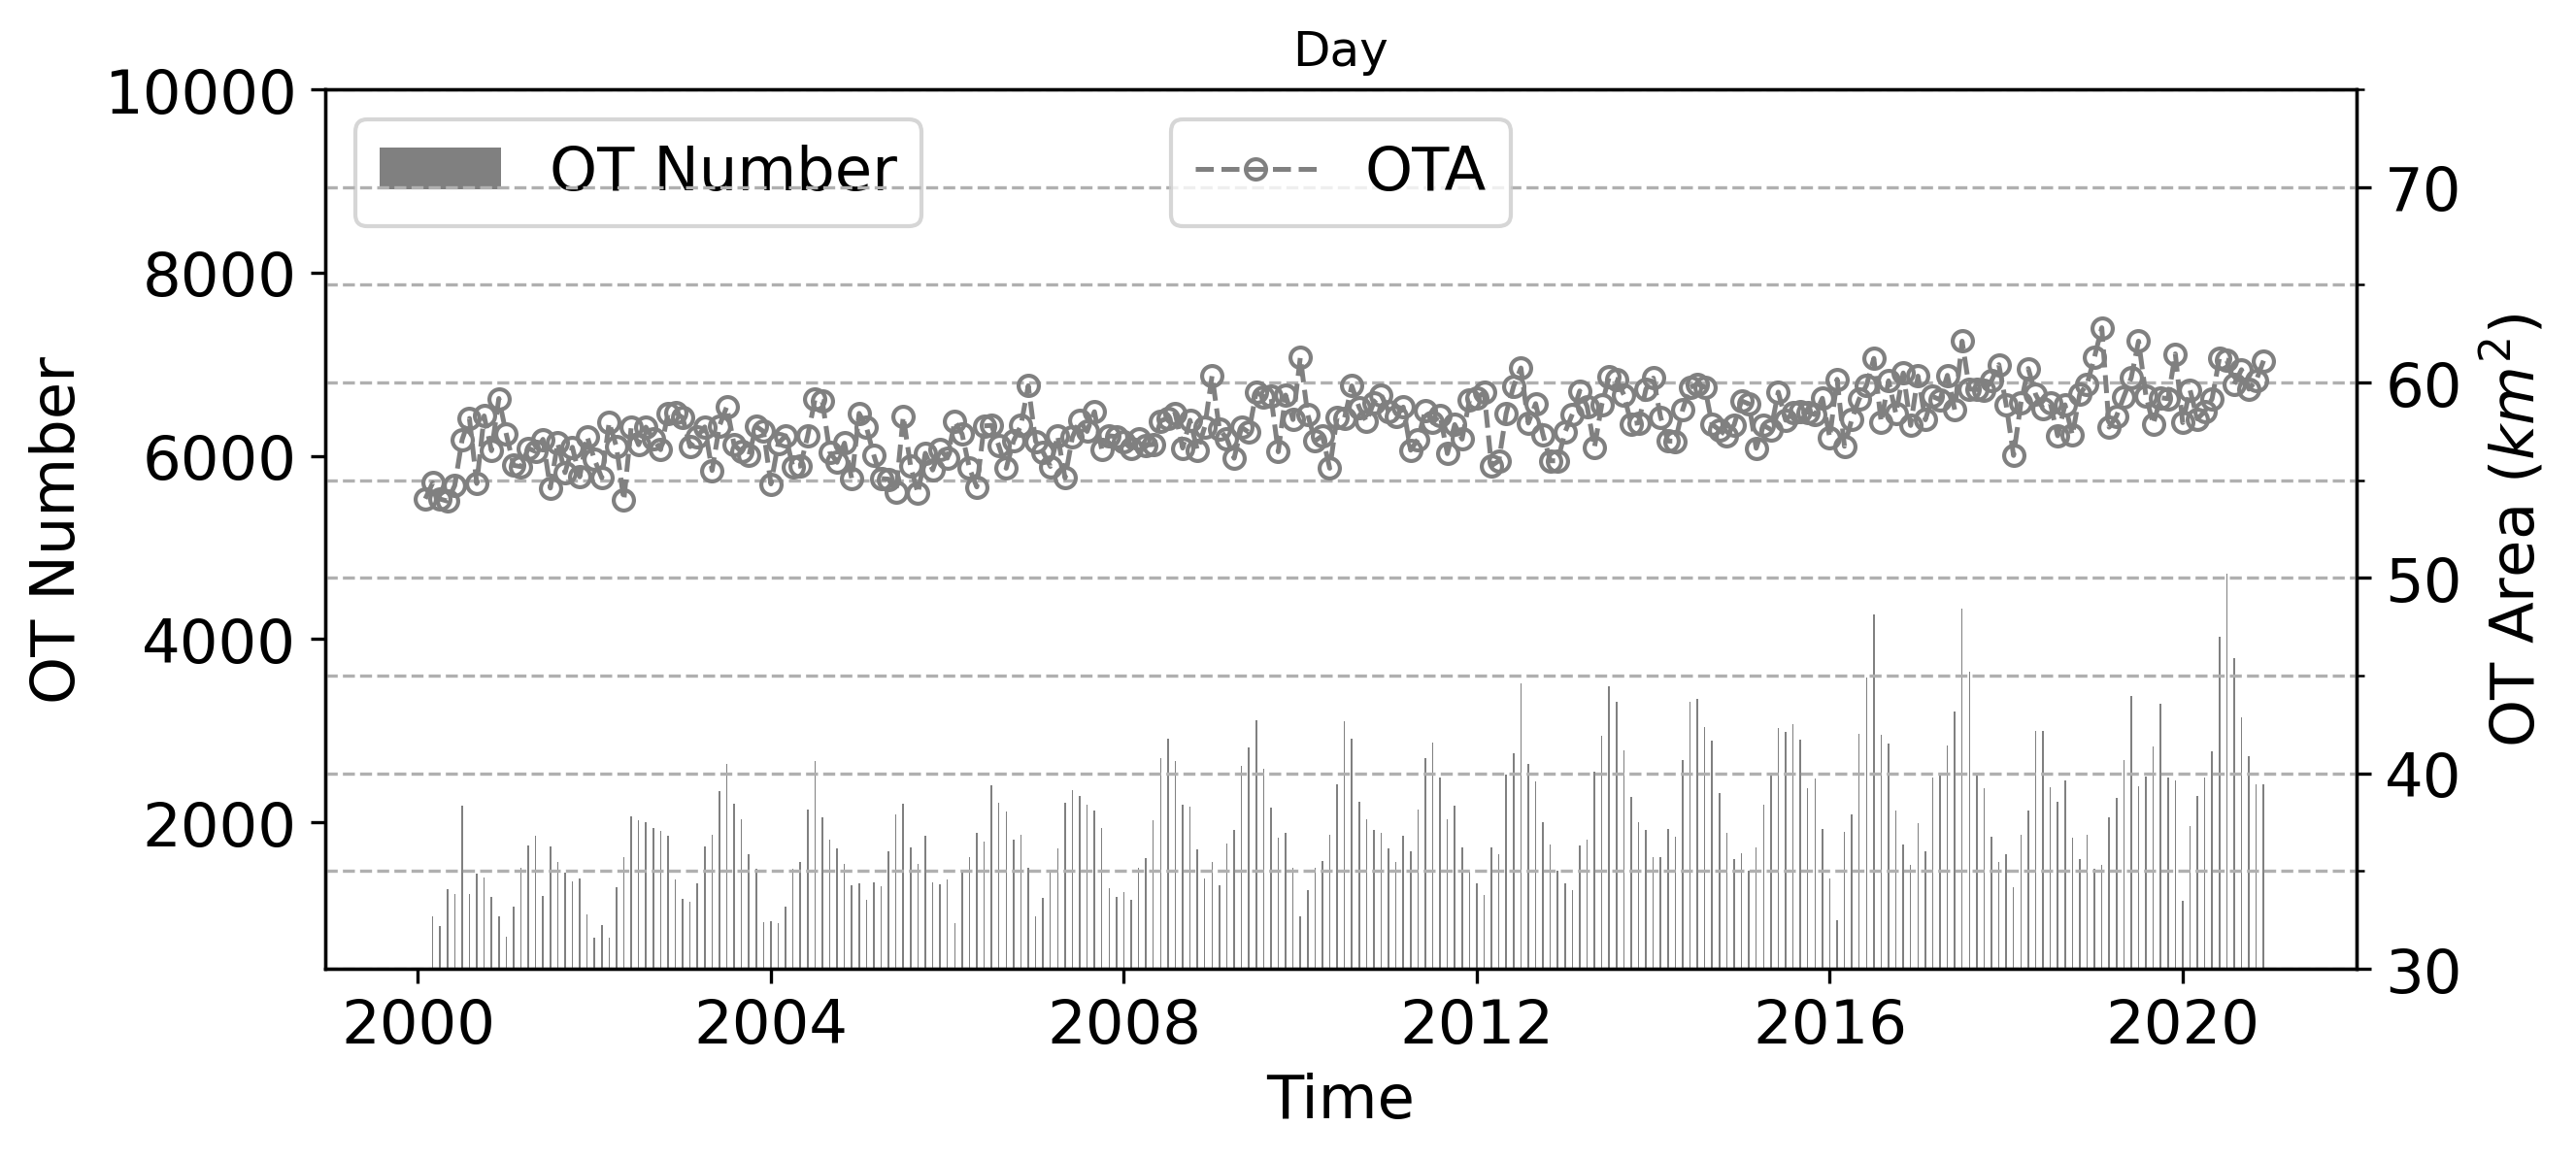

/tmp/ipykernel_152734/2702167142.py:51: RuntimeWarning: invalid value encountered in true_divide
  ave_OTA=np.sum(OT_area_timeseries[ind,:,dnflag],axis=0)/\
/tmp/ipykernel_152734/2702167142.py:76: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True,which='both',linestyle='--')


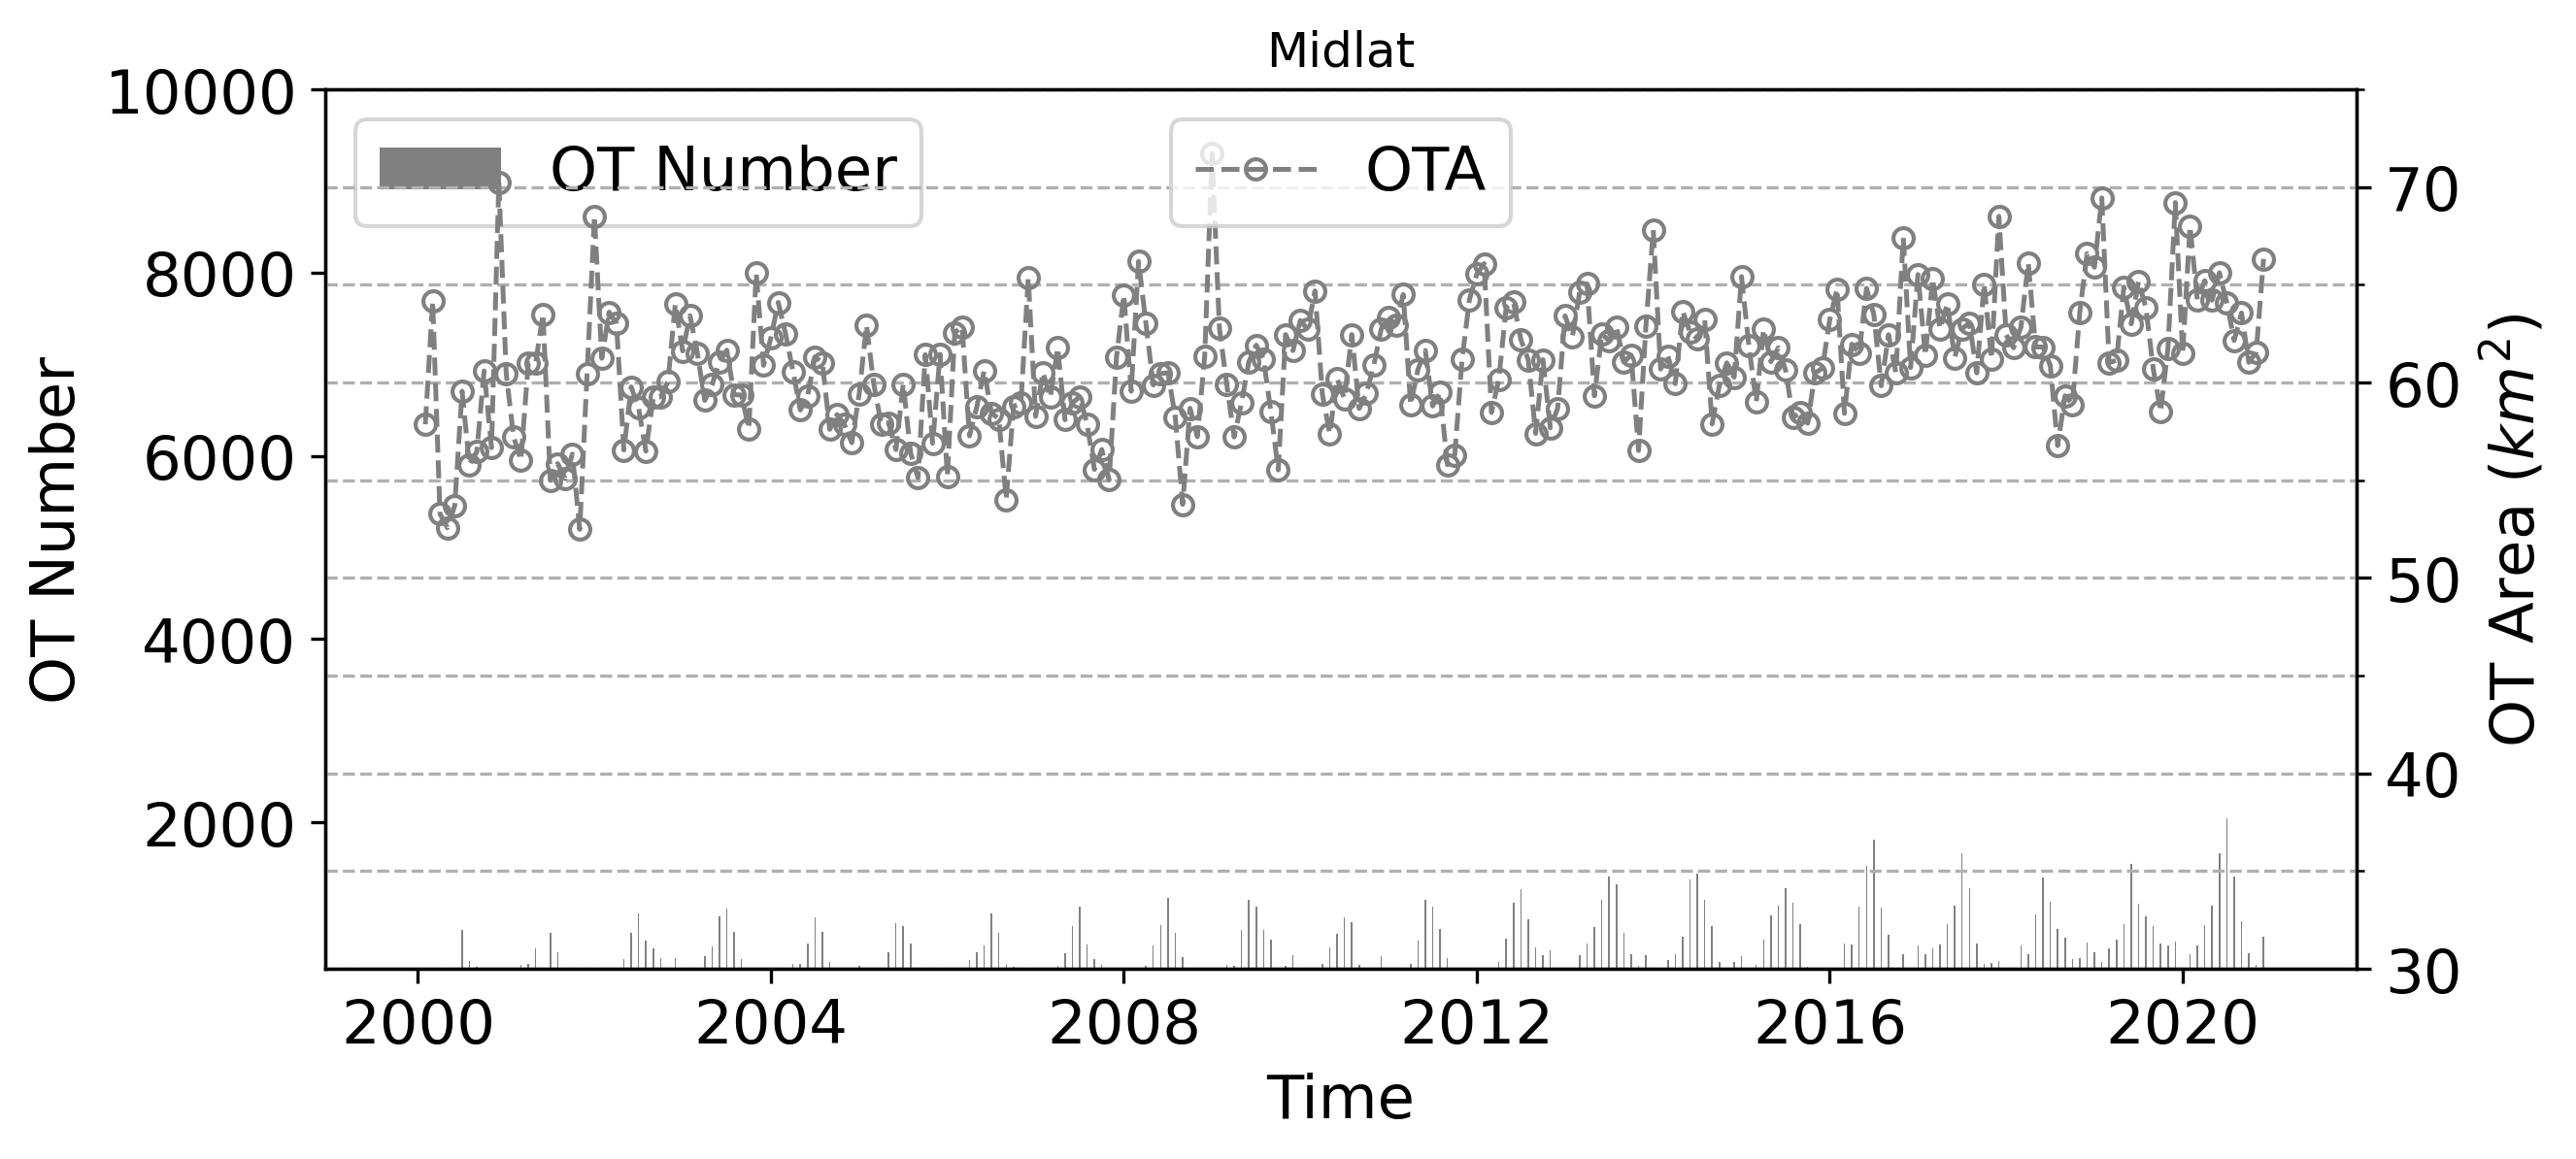

In [3]:
#to plot time series 
from scipy.stats import pearsonr

ytitle='Day'
dnflag=0

#for global average
ave_OTA=np.sum(OT_area_timeseries[:,:,dnflag],axis=0)/np.sum(OT_num_timeseries[:,:,dnflag],axis=0)
print(ave_OTA.shape)
#ave_OTA=np.sum(np.sum(OT_area_timeseries,axis=0),axis=1)/np.sum(np.sum(OT_num_timeseries,axis=0),axis=1) # for day or night
fig, ax = plt.subplots(figsize=[9,4],dpi=300)
x=np.arange(252)
value=[0,48,96,144,192,240]
name=['2000','2004','2008','2012','2016','2020']
#value=[0,48,96,144,192]
#name=['2002','2006','2010','2013','2017']
width=0.2
print(OT_num_timeseries.shape)
ax.bar(x,np.sum(OT_num_timeseries[:,:,dnflag],axis=0),width,color='grey') # for all
#ax.bar(x,np.sum(np.sum(OT_num_timeseries,axis=0),axis=1),width,color='grey')
#ax.set_yscale('log')
ax.tick_params(labelsize=15)
ax.set_ylabel('OT Number',size=15)
ax.set_ylim([400,10000])
ax.set_xticks(value)
ax.set_xticklabels(name)
ax.set_xlabel('Time',size=15)
ax.set_title(ytitle)
ax.legend(['OT Number'],loc=2,fontsize=15)

ax1=ax.twinx() # instantiate a second axes that shares the same x-axis 
ax1.plot(x,ave_OTA,'o--',linewidth=1.2,color='grey',markersize=5,mfc='none')

ax1.set_ylabel('OT Area ($km^2$)',size=15)
ax1.tick_params(labelsize=15)
ax1.set_ylim([30,75])
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
#ax.grid(b=True,linestyle='--')
ax1.grid(b=True,which='both',linestyle='--')
ax1.legend(['OTA'],loc=9,fontsize=15)
index=np.where(OT_num_timeseries == 0)
index=index[0]
ave_OTA[index]=0.0
plt.show()

#=== for zonal mean ====
#print(OT_num_timeseries.shape)
lat=np.arange(180)-90+0.5
ind=np.where(abs(lat) >= 25)
ind=ind[0]
ave_OTA=np.sum(OT_area_timeseries[ind,:,dnflag],axis=0)/\
np.sum(OT_num_timeseries[ind,:,dnflag],axis=0)
fig, ax = plt.subplots(figsize=[9,4],dpi=300)
x=np.arange(252)

ax.bar(x,np.sum(OT_num_timeseries[ind,:,dnflag],axis=0),width,color='grey')
#ax.set_yscale('log')
ax.tick_params(labelsize=15)
ax.set_title('Midlat')
#ax.set_title('Tropics')
ax.set_ylabel('OT Number',size=15)
ax.set_ylim([400,10000])
ax.set_xticks(value)
ax.set_xticklabels(name)
ax.set_xlabel('Time',size=15)
ax.legend(['OT Number'],loc=2,fontsize=15)

ax1=ax.twinx() # instantiate a second axes that shares the same x-axis 
ax1.plot(x,ave_OTA,'o--',linewidth=1.2,color='grey',markersize=5,mfc='none')

ax1.set_ylabel('OT Area ($km^2$)',size=15)
ax1.tick_params(labelsize=15)
ax1.set_ylim([30,75])
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
#ax.grid(b=True,linestyle='--')
ax1.grid(b=True,which='both',linestyle='--')
ax1.legend(['OTA'],loc=9,fontsize=15)
index=np.where(OT_num_timeseries == 0)
index=index[0]
ave_OTA[index]=0.0
#print('pearsons correlation between OTnum and OTA',pearsonr(OT_num_timeseries,ave_OTA))
plt.show()

/tmp/ipykernel_152734/3741320780.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True,which='both',linestyle='--')
/tmp/ipykernel_152734/3741320780.py:21: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  All_OTA[All_OTA =='nan']=0.0
/tmp/ipykernel_152734/3741320780.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  All_OTA_poly[All_OTA_poly == 'nan']=0.0
/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/cartopy

sum of circle, polygon area num 1231445 1231445
469.32459317520176 358.669258836546


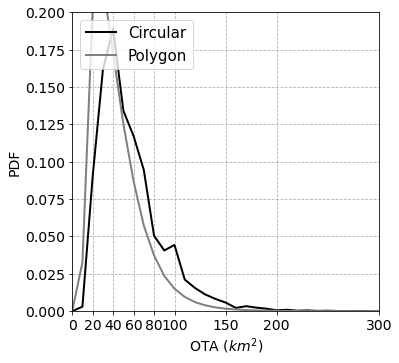

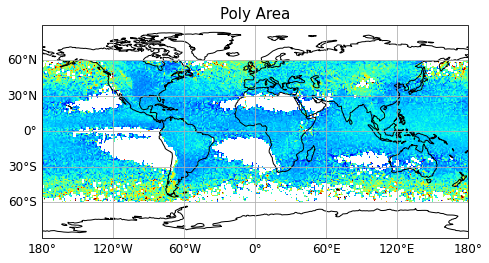

In [8]:
#===== this cell is to compare polygon area and circluar area
All_OTA_poly_pdf1=np.sum(All_OTA_poly_pdf,axis=0)
All_OTA_poly_pdf1=np.sum(All_OTA_poly_pdf1,axis=2)
All_OTA_poly_pdf2=np.sum(All_OTA_poly_pdf1,axis=1)

fig,ax =plt.subplots(1,figsize=([5.5,5.5]))
x_ota=np.arange(100)*10

f0=ax.plot(x_ota,All_OTA_pdf2/float(np.sum(All_OTA_pdf2)),'black',linewidth=2)
f1=ax.plot(x_ota,All_OTA_poly_pdf2/float(np.sum(All_OTA_poly_pdf2)),'grey',linewidth=2)
#f1=ax[0].plot(x_ota,All_OTA_pdf_LP2/float(np.sum(All_OTA_pdf_LP2)),'grey',linewidth=2)
ax.set_xlim([0,300])
ax.set_ylim([0,0.2])
ax.set_xlabel('OTA ($km^2$)',size=fontsz)
ax.set_ylabel('PDF',size=fontsz)
ax.set_xticks([0,20,40,60,80,100,150,200,300])
ax.tick_params(labelsize=fontsz)
ax.grid(b=True,which='both',linestyle='--')
print('sum of circle, polygon area num',np.sum(All_OTA_pdf2),np.sum(All_OTA_poly_pdf2))
#calculate the average average 
All_OTA[All_OTA =='nan']=0.0
All_OTA_poly[All_OTA_poly == 'nan']=0.0
ave_ota=np.sum(All_OTA*All_OT_num)/np.sum(All_OT_num)
ave_ota_poly=np.sum(All_OTA_poly*All_OT_num)/np.sum(All_OT_num)
print(ave_ota,ave_ota_poly)
ax.legend(['Circular','Polygon'],loc=2,fontsize=15)


fig,ax =plt.subplots(1,figsize=([6,6]),subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
img_extent=(-180,180,-90,90)
All_OTA_poly1= np.sum(All_OTA_poly,axis=3)
All_OTA_poly2= np.sum(All_OTA_poly1,axis=2)
ave_OTA_poly = All_OTA_poly2/All_OT_num_2

ave_OTA_poly1=ave_OTA_poly.T
ave_OTA_poly2=ave_OTA_poly1[::-1]
p3=ax.imshow(ave_OTA_poly2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=10,vmax=110,cmap='jet')
#p=axs[0,1].contourf(ave_OTA_2,[10,20,40,60,70,80,90,100,150,200,250,300],extent=img_extent,transform=ccrs.PlateCarree(),\
#                    cmap='tab20c')
ax.coastlines(resolution='110m', color='black', linewidth=1)
ax.set_title('Poly Area',fontsize=15)
gl=ax.gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False

/tmp/ipykernel_133961/2493387426.py:29: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True,which='both',linestyle='--')
/tmp/ipykernel_133961/2493387426.py:53: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=True,which='both',linestyle='--')


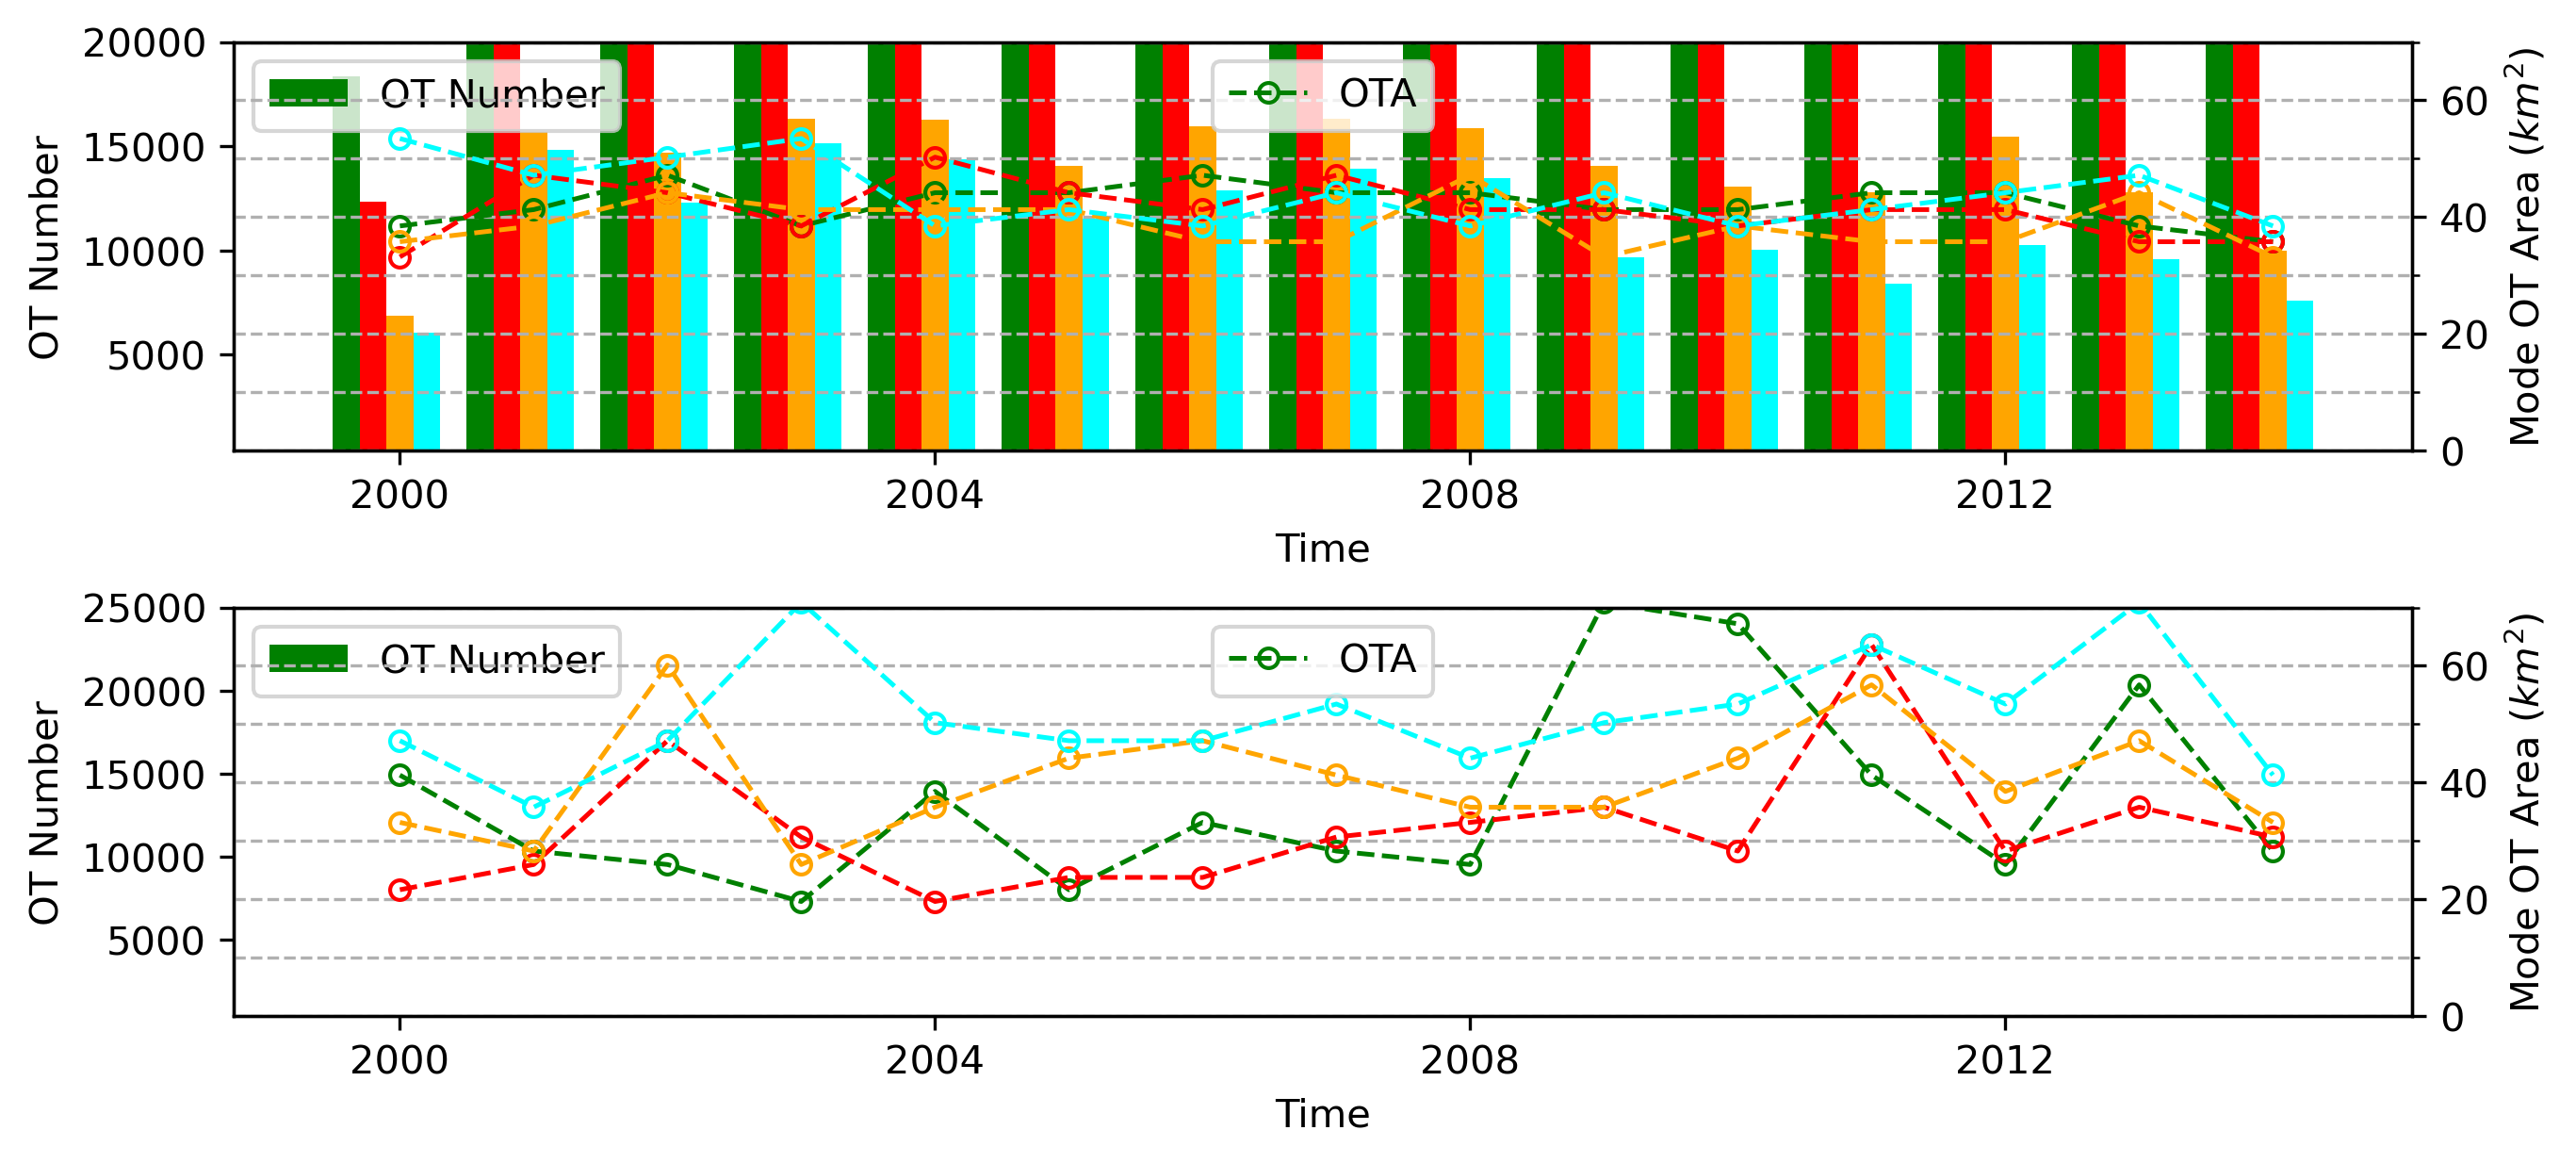

/tmp/ipykernel_133961/2493387426.py:70: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[0].grid(b=True,which='both',linestyle='--')
/tmp/ipykernel_133961/2493387426.py:86: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[1].grid(b=True,which='both',linestyle='--')


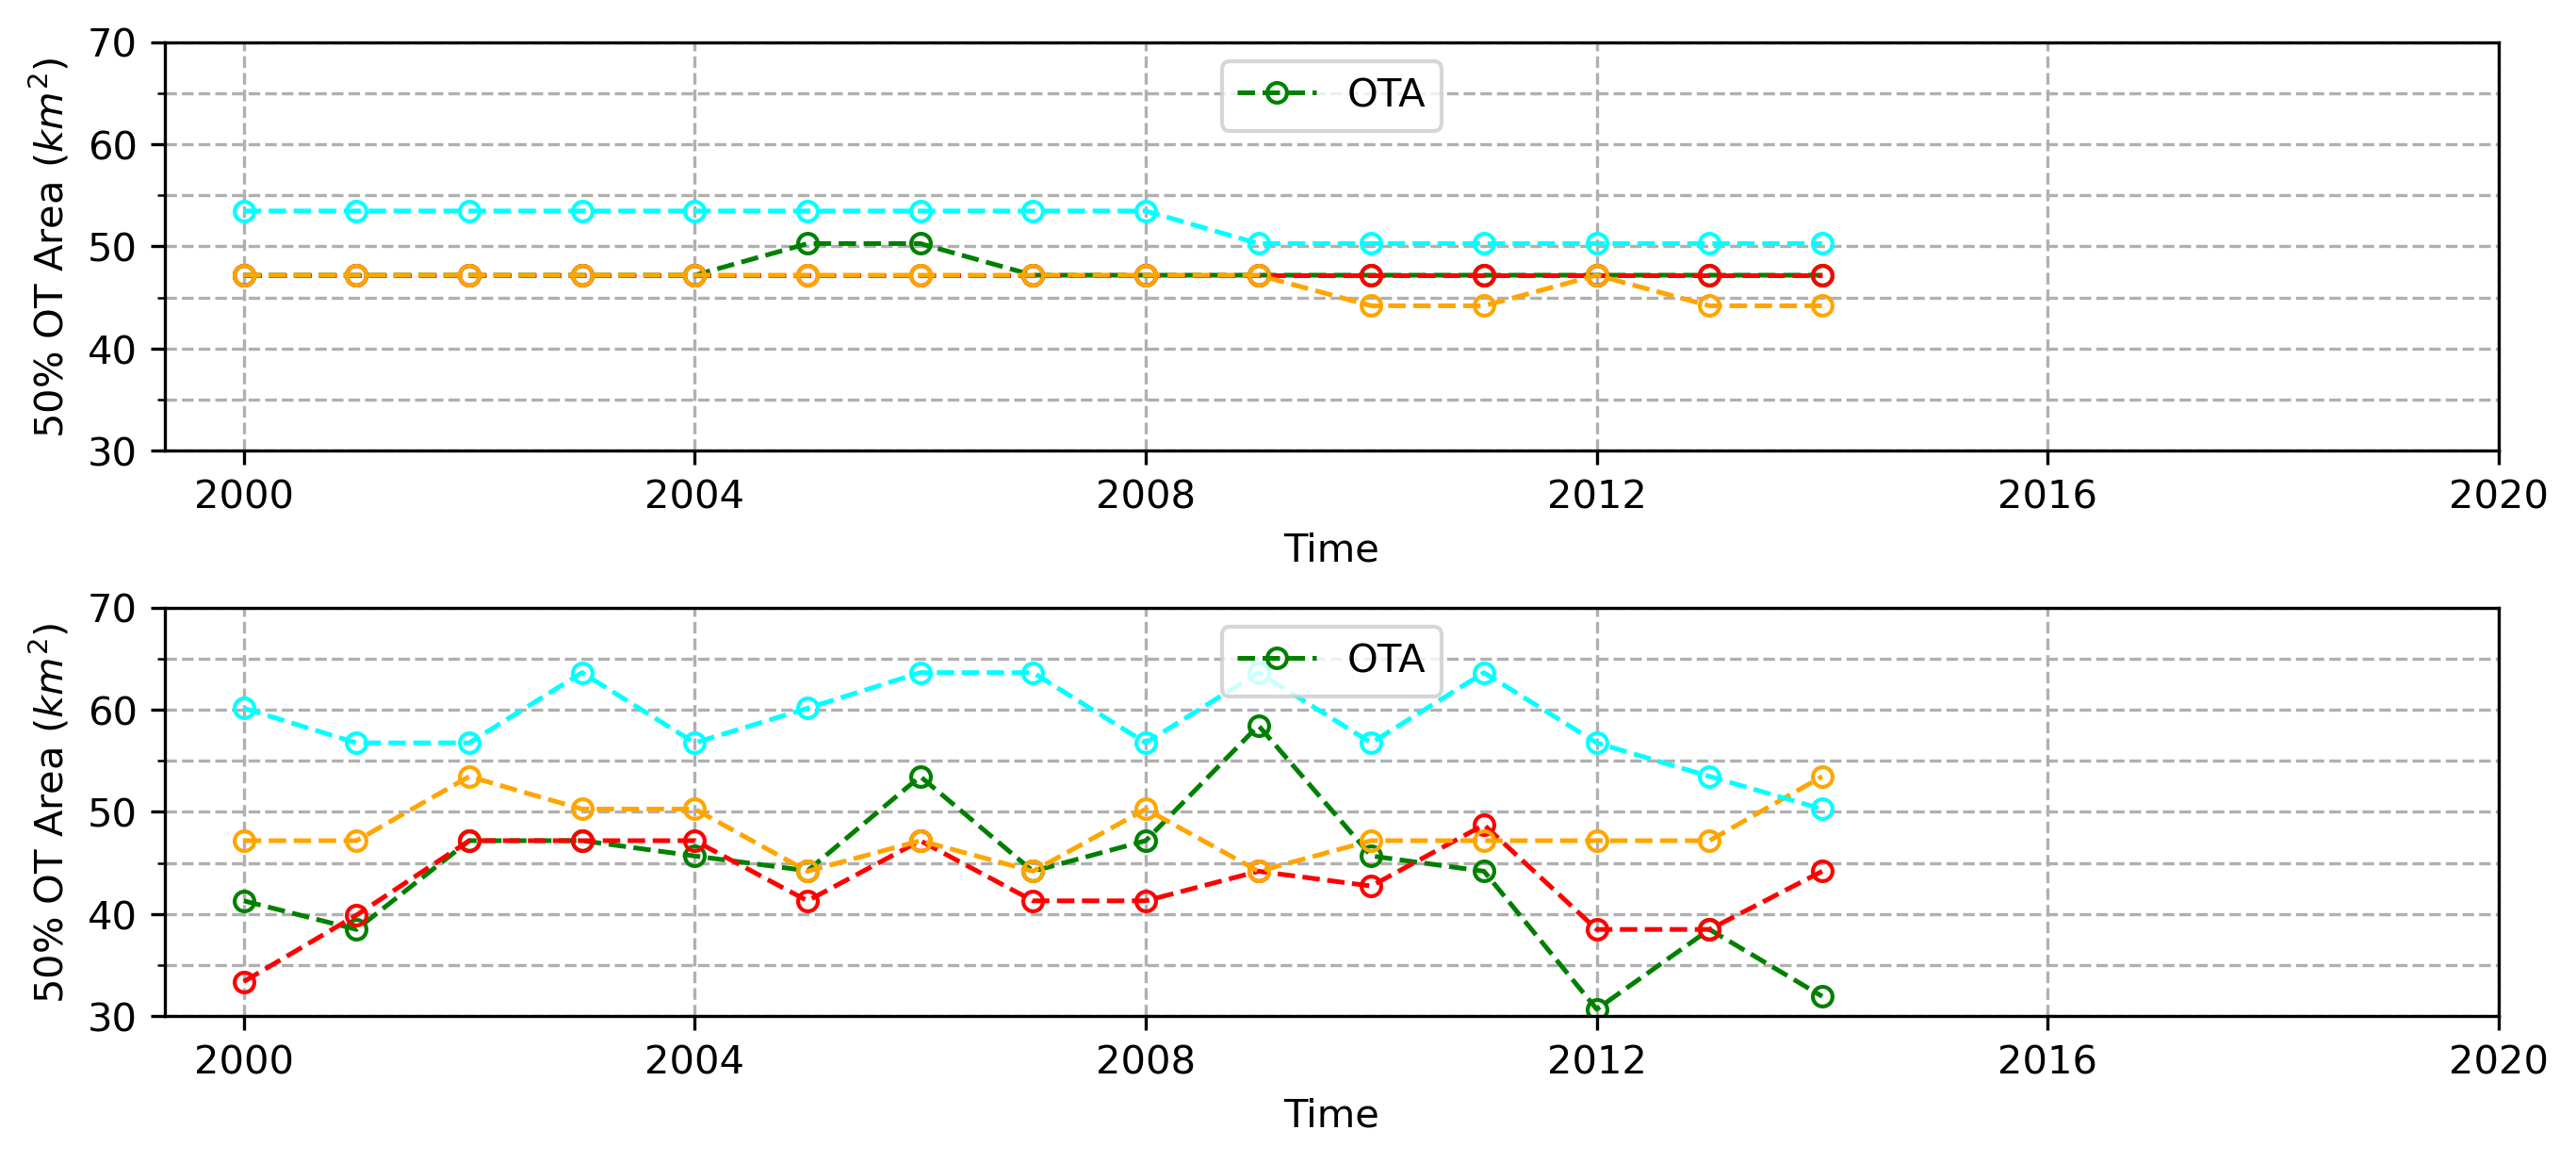

/tmp/ipykernel_133961/2493387426.py:103: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[0].grid(b=True,which='both',linestyle='--')
/tmp/ipykernel_133961/2493387426.py:119: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[1].grid(b=True,which='both',linestyle='--')


31.931343 63.81359672546387
[41.28249  38.48451  47.172974 47.172974 45.67581  44.22773  53.45616
 44.178646 47.172974 58.43853  45.67581  44.178646 30.679615 38.48451
 31.931343]


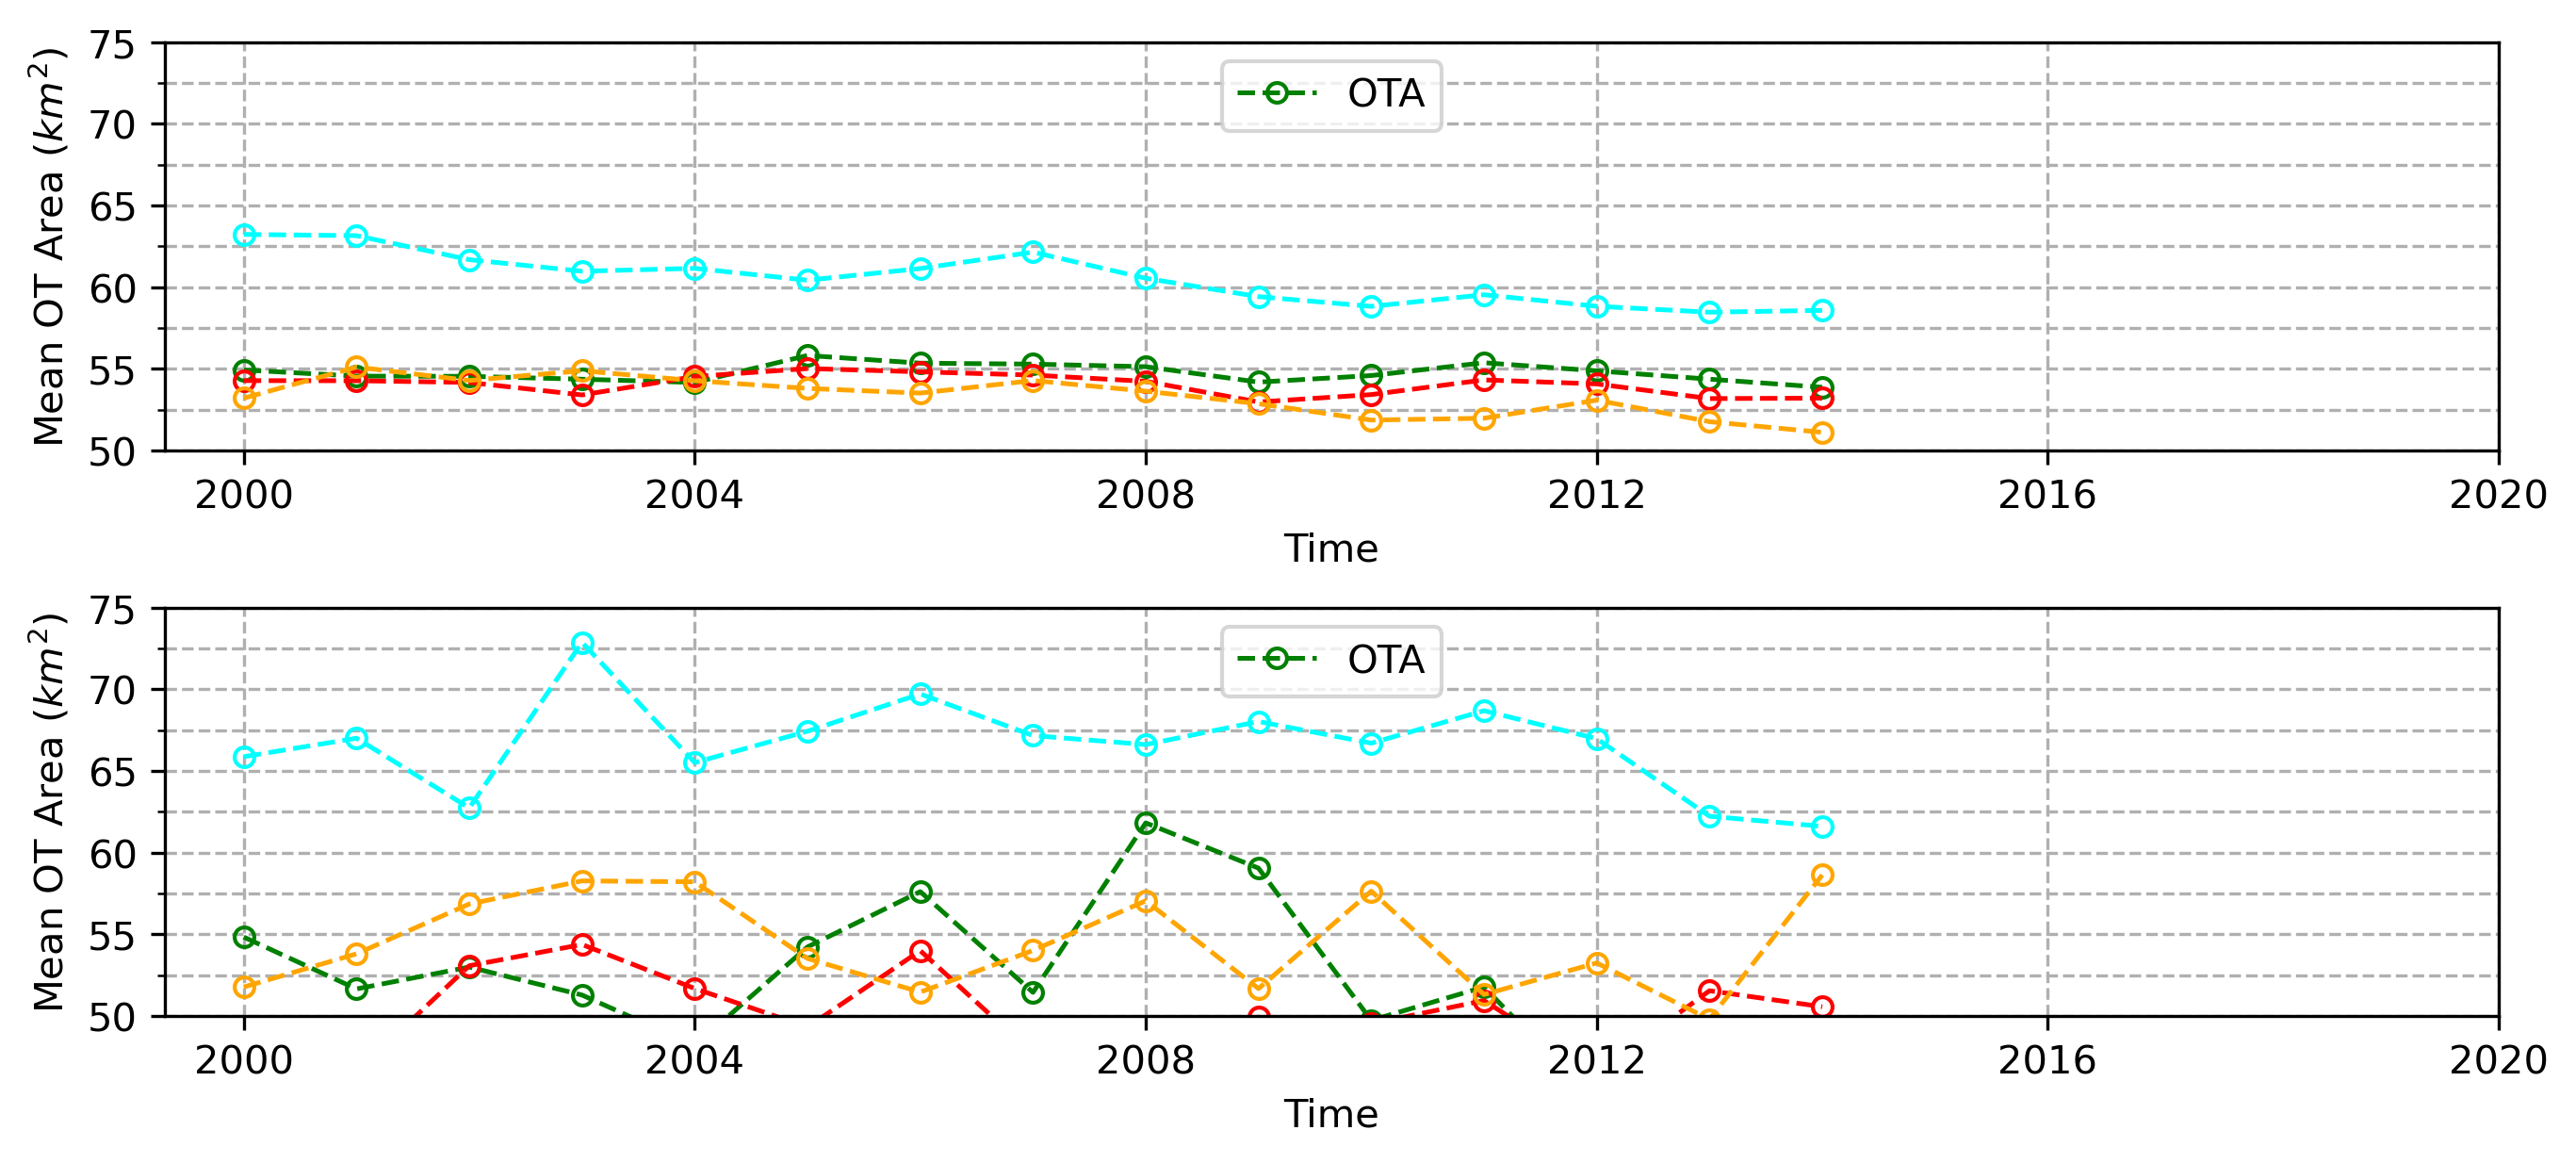

In [11]:
#==== time series derived from PDF
x=np.arange(nyear)
value=[0,4,8,12,16,20]
fontsz=10
name=['2000','2004','2008','2012','2016','2020']
fig, ax = plt.subplots(2,figsize=[9,4],dpi=300,constrained_layout=True)
width=0.2
ax[0].bar(x-2*width,OT_num_10dnyr_timeseries,width,color='green')
ax[0].bar(x-width,OT_num_1025dnyr_timeseries,width,color='red')
ax[0].bar(x,OT_num_2540dnyr_timeseries,width,color='orange')
ax[0].bar(x+width,OT_num_4060dnyr_timeseries,width,color='cyan')
ax[0].tick_params(labelsize=fontsz)
ax[0].set_ylabel('OT Number',size=fontsz)
ax[0].set_ylim([400,20000])
ax[0].set_xticks(value)
ax[0].set_xticklabels(name)
ax[0].set_xlabel('Time',size=fontsz)
ax[0].legend(['OT Number'],loc=2,fontsize=fontsz)
ax1=ax[0].twinx() # instantiate a second axes that shares the same x-axis 
ax1.plot(x,OT_area_10dnyr_timeseries,'o--',linewidth=1.2,color='green',markersize=5,mfc='none')
ax1.plot(x,OT_area_1025dnyr_timeseries,'o--',linewidth=1.2,color='red',markersize=5,mfc='none')
ax1.plot(x,OT_area_2540dnyr_timeseries,'o--',linewidth=1.2,color='orange',markersize=5,mfc='none')
ax1.plot(x,OT_area_4060dnyr_timeseries,'o--',linewidth=1.2,color='cyan',markersize=5,mfc='none')
ax1.set_ylabel('Mode OT Area ($km^2$)',size=fontsz)
ax1.tick_params(labelsize=fontsz)
ax1.set_ylim([0,70])
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
#ax.grid(b=True,linestyle='--')
ax1.grid(b=True,which='both',linestyle='--')
ax1.legend(['OTA'],loc=9,fontsize=fontsz)

ax[1].bar(x-2*width,OT_num_10ngyr_timeseries,width,color='green')
ax[1].bar(x-width,OT_num_1025ngyr_timeseries,width,color='red')
ax[1].bar(x,OT_num_2540ngyr_timeseries,width,color='orange')
ax[1].bar(x+width,OT_num_4060ngyr_timeseries,width,color='cyan')
ax[1].tick_params(labelsize=fontsz)
ax[1].set_ylabel('OT Number',size=fontsz)
ax[1].set_ylim([400,25000])
ax[1].set_xticks(value)
ax[1].set_xticklabels(name)
ax[1].set_xlabel('Time',size=fontsz)
ax[1].legend(['OT Number'],loc=2,fontsize=fontsz)
ax2=ax[1].twinx() # instantiate a second axes that shares the same x-axis 
ax2.plot(x,OT_area_10ngyr_timeseries,'o--',linewidth=1.2,color='green',markersize=5,mfc='none')
ax2.plot(x,OT_area_1025ngyr_timeseries,'o--',linewidth=1.2,color='red',markersize=5,mfc='none')
ax2.plot(x,OT_area_2540ngyr_timeseries,'o--',linewidth=1.2,color='orange',markersize=5,mfc='none')
ax2.plot(x,OT_area_4060ngyr_timeseries,'o--',linewidth=1.2,color='cyan',markersize=5,mfc='none')
ax2.set_ylabel('Mode OT Area ($km^2$)',size=fontsz)
ax2.tick_params(labelsize=fontsz)
ax2.set_ylim([0,70])
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
#ax.grid(b=True,linestyle='--')
ax2.grid(b=True,which='both',linestyle='--')
ax2.legend(['OTA'],loc=9,fontsize=fontsz)
plt.show()

fig, ax = plt.subplots(2,figsize=[9,4],dpi=300,constrained_layout=True)
ax[0].plot(x,OT_90area_10dnyr_timeseries,'o--',linewidth=1.2,color='green',markersize=5,mfc='none')
ax[0].plot(x,OT_90area_1025dnyr_timeseries,'o--',linewidth=1.2,color='red',markersize=5,mfc='none')
ax[0].plot(x,OT_90area_2540dnyr_timeseries,'o--',linewidth=1.2,color='orange',markersize=5,mfc='none')
ax[0].plot(x,OT_90area_4060dnyr_timeseries,'o--',linewidth=1.2,color='cyan',markersize=5,mfc='none')
ax[0].set_xticks(value)
ax[0].set_xticklabels(name)
ax[0].set_xlabel('Time',size=fontsz)
ax[0].set_ylabel('50% OT Area ($km^2$)',size=fontsz)
ax[0].tick_params(labelsize=fontsz)
ax[0].set_ylim([30,70])
ax[0].yaxis.set_minor_locator(AutoMinorLocator(2))
#ax.grid(b=True,linestyle='--')
ax[0].grid(b=True,which='both',linestyle='--')
ax[0].legend(['OTA'],loc=9,fontsize=fontsz)


ax[1].plot(x,OT_90area_10ngyr_timeseries,'o--',linewidth=1.2,color='green',markersize=5,mfc='none')
ax[1].plot(x,OT_90area_1025ngyr_timeseries,'o--',linewidth=1.2,color='red',markersize=5,mfc='none')
ax[1].plot(x,OT_90area_2540ngyr_timeseries,'o--',linewidth=1.2,color='orange',markersize=5,mfc='none')
ax[1].plot(x,OT_90area_4060ngyr_timeseries,'o--',linewidth=1.2,color='cyan',markersize=5,mfc='none')
ax[1].set_xticks(value)
ax[1].set_xticklabels(name)
ax[1].set_xlabel('Time',size=fontsz)
ax[1].set_ylabel('50% OT Area ($km^2$)',size=fontsz)
ax[1].tick_params(labelsize=fontsz)
ax[1].set_ylim([30,70])
ax[1].yaxis.set_minor_locator(AutoMinorLocator(2))
#ax.grid(b=True,linestyle='--')
ax[1].grid(b=True,which='both',linestyle='--')
ax[1].legend(['OTA'],loc=9,fontsize=fontsz)
plt.show()

fig, ax = plt.subplots(2,figsize=[9,4],dpi=300,constrained_layout=True)
ax[0].plot(x,OT_avearea_10dnyr_timeseries,'o--',linewidth=1.2,color='green',markersize=5,mfc='none')
ax[0].plot(x,OT_avearea_1025dnyr_timeseries,'o--',linewidth=1.2,color='red',markersize=5,mfc='none')
ax[0].plot(x,OT_avearea_2540dnyr_timeseries,'o--',linewidth=1.2,color='orange',markersize=5,mfc='none')
ax[0].plot(x,OT_avearea_4060dnyr_timeseries,'o--',linewidth=1.2,color='cyan',markersize=5,mfc='none')
ax[0].set_xticks(value)
ax[0].set_xticklabels(name)
ax[0].set_xlabel('Time',size=fontsz)
ax[0].set_ylabel('Mean OT Area ($km^2$)',size=fontsz)
ax[0].tick_params(labelsize=fontsz)
ax[0].set_ylim([50,75])
ax[0].yaxis.set_minor_locator(AutoMinorLocator(2))
#ax.grid(b=True,linestyle='--')
ax[0].grid(b=True,which='both',linestyle='--')
ax[0].legend(['OTA'],loc=9,fontsize=fontsz)


ax[1].plot(x,OT_avearea_10ngyr_timeseries,'o--',linewidth=1.2,color='green',markersize=5,mfc='none')
ax[1].plot(x,OT_avearea_1025ngyr_timeseries,'o--',linewidth=1.2,color='red',markersize=5,mfc='none')
ax[1].plot(x,OT_avearea_2540ngyr_timeseries,'o--',linewidth=1.2,color='orange',markersize=5,mfc='none')
ax[1].plot(x,OT_avearea_4060ngyr_timeseries,'o--',linewidth=1.2,color='cyan',markersize=5,mfc='none')
ax[1].set_xticks(value)
ax[1].set_xticklabels(name)
ax[1].set_xlabel('Time',size=fontsz)
ax[1].set_ylabel('Mean OT Area ($km^2$)',size=fontsz)
ax[1].tick_params(labelsize=fontsz)
ax[1].set_ylim([50,75])
ax[1].yaxis.set_minor_locator(AutoMinorLocator(2))
#ax.grid(b=True,linestyle='--')
ax[1].grid(b=True,which='both',linestyle='--')
ax[1].legend(['OTA'],loc=9,fontsize=fontsz)
print(np.median(OTA_night_10_points),np.percentile(OTA_night_10_points,90))
print(OT_90area_10ngyr_timeseries)

In [6]:
# to analysis the samples in midlat and tropics
print('all latitude OT num（%）',np.sum(All_OTA_pdf),np.sum(All_OT_num),\
      np.sum(All_OTA_pdf)/(np.sum(All_OTA_pdf)+np.sum(All_OTA_pdf_LP)))

index=np.where(abs(lat) < 25)
index=index[0]
print('tropic OT num (%)', np.sum(All_OTA_pdf[index,:,:,:]),\
      np.sum(All_OTA_pdf[index,:,:,:])/(np.sum(All_OTA_pdf[index,:,:,:])+np.sum(All_OTA_pdf_LP[index,:,:,:])))
print('tropic NOT num (%)', np.sum(All_OTA_pdf_LP[index,:,:,:]),\
      np.sum(All_OTA_pdf_LP[index,:,:,:])/(np.sum(All_OTA_pdf[index,:,:,:])+np.sum(All_OTA_pdf_LP[index,:,:,:])))

index=np.where(abs(lat) >= 25)
index=index[0]
print('Midlat OT num (%)', np.sum(All_OTA_pdf[index,:,:,:]),\
     np.sum(All_OTA_pdf[index,:,:,:])/(np.sum(All_OTA_pdf[index,:,:,:])+np.sum(All_OTA_pdf_LP[index,:,:,:])))
print('Midlat NOT num (%)', np.sum(All_OTA_pdf_LP[index,:,:,:]),\
     np.sum(All_OTA_pdf_LP[index,:,:,:])/(np.sum(All_OTA_pdf[index,:,:,:])+np.sum(All_OTA_pdf_LP[index,:,:,:])))


all latitude OT num（%） 1910845 1910845.0 0.35165899524108446
tropic OT num (%) 1398461 0.622894471117335
tropic NOT num (%) 846640 0.37710552888266496
Midlat OT num (%) 512384 0.16068742747828269
Midlat NOT num (%) 2676316 0.8393125725217173


max of OT hetero 0.1262976974248886 0.005704327020794153 (360, 180)


/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/tmp/ipykernel_133961/3330098960.py:61: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.26, top=0.9, left=0.01, right=0.95,


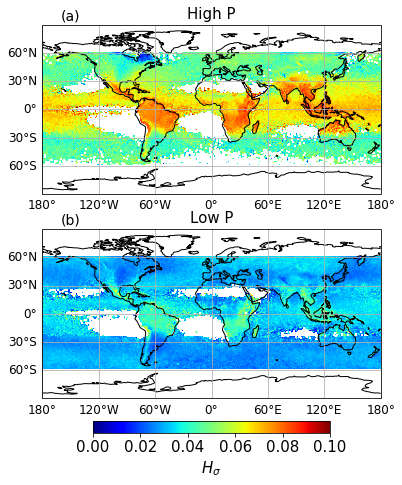

In [12]:
#to plot heterogeneity map for high P and low P
fig,axs =plt.subplots(2,figsize=([5,10]),subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
img_extent=(-180,180,-90,90)

All_OT_num_1= np.sum(All_OT_num,axis=3)
All_OT_num_2= np.sum(All_OT_num_1,axis=2)

#ax=plt.axes(projection=ccrs.PlateCarree())
Allnumb1=All_OT_num_2.T
Allnumb2=Allnumb1[::-1]
Allnumb2[Allnumb2 == 0] = 'nan'

All_OT_hetero_1= np.sum(All_OT_hetero,axis=3)
All_OT_hetero_2= np.sum(All_OT_hetero_1,axis=2)
ave_OT_hetero = All_OT_hetero_2/All_OT_num_2

print('max of OT hetero',np.nanmax(ave_OT_hetero),np.nanmin(ave_OT_hetero),ave_OT_hetero.shape)
#ax=plt.axes(projection=ccrs.PlateCarree())
ave_OT_hetero_1=ave_OT_hetero.T
ave_OT_hetero_2=ave_OT_hetero_1[::-1]
p1=axs[0].imshow(ave_OT_hetero_2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=0,vmax=0.1,cmap='jet')
#p=axs[0,1].contourf(ave_OTA_2,[10,20,40,60,70,80,90,100,150,200,250,300],extent=img_extent,transform=ccrs.PlateCarree(),\
#                    cmap='tab20c')
axs[0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0].set_title('High P',fontsize=15)
axs[0].text(-160,95,'(a)',fontsize=14)
gl=axs[0].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False

All_OT_num_LP_1= np.sum(All_OT_num_LP,axis=3)
All_OT_num_LP_2= np.sum(All_OT_num_LP_1,axis=2)


#ax=plt.axes(projection=ccrs.PlateCarree())
Allnumb_LP1=All_OT_num_LP_2.T
Allnumb_LP2=Allnumb_LP1[::-1]
Allnumb_LP2[Allnumb_LP2 == 0] = 'nan'
#index=np.where(Allnumb2 == 0)
#index=index[0]
#Allnumb2[index]=np.nan
All_OT_hetero_LP1= np.sum(All_OT_hetero_LP,axis=3)
All_OT_hetero_LP2= np.sum(All_OT_hetero_LP1,axis=2)
ave_OT_hetero_LP = All_OT_hetero_LP2/All_OT_num_LP_2
ave_OT_hetero_LP1=ave_OT_hetero_LP.T
ave_OT_hetero_LP2=ave_OT_hetero_LP1[::-1]

p2=axs[1].imshow(ave_OT_hetero_LP2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=0,vmax=0.1,cmap='jet')
axs[1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1].set_title('Low P',fontsize=15)
gl=axs[1].gridlines(draw_labels=True)
axs[1].text(-160,95,'(b)',fontsize=14)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False


fig.subplots_adjust(bottom=0.26, top=0.9, left=0.01, right=0.95,
                    wspace=0.15, hspace=0.01)

cb1=fig.colorbar(p2,ax=axs[1],orientation='horizontal',shrink=0.7,pad=0.1)
cb1.ax.tick_params(labelsize=15)
cb1.set_label(label='$H_\sigma$',size=15)



(180, 60, 12, 2)


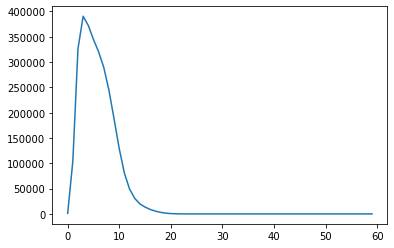

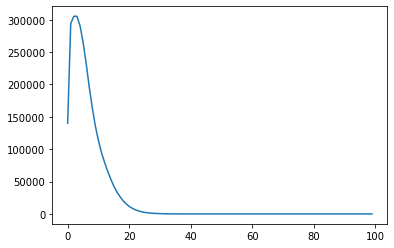

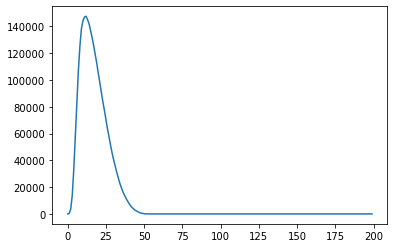

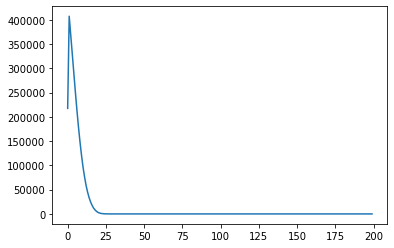

73252 (180, 100, 12, 2)
(100, 2)


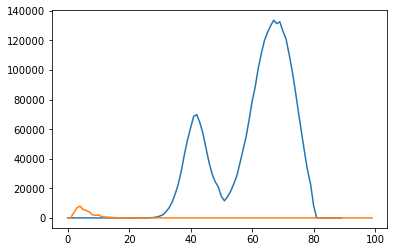

In [2]:
#plot the pdf of OT properties 
print(All_hetero_pdf.shape)
All_hetero_pdf_LP1=np.sum(All_hetero_pdf_LP,axis=0)
All_hetero_pdf_LP1=np.sum(All_hetero_pdf_LP1,axis=2)
All_hetero_pdf_LP2=np.sum(All_hetero_pdf_LP1,axis=1)
plt.plot(All_hetero_pdf_LP2)
plt.show()

All_BTD_wv_pdf_LP1=np.sum(All_BTD_wv_pdf_LP,axis=0)
All_BTD_wv_pdf_LP1=np.sum(All_BTD_wv_pdf_LP1,axis=2)
All_BTD_wv_pdf_LP2=np.sum(All_BTD_wv_pdf_LP1,axis=1)
plt.plot(All_BTD_wv_pdf_LP2)
plt.show()

All_BTD_ci_pdf_LP1=np.sum(All_BTD_ci_pdf_LP,axis=0)
All_BTD_ci_pdf_LP1=np.sum(All_BTD_ci_pdf_LP1,axis=2)
All_BTD_ci_pdf_LP2=np.sum(All_BTD_ci_pdf_LP1,axis=1)
plt.plot(All_BTD_ci_pdf_LP2)
plt.show()

All_BTD_trop_pdf_LP1=np.sum(All_BTD_trop_pdf_LP,axis=0)
All_BTD_trop_pdf_LP1=np.sum(All_BTD_trop_pdf_LP1,axis=2)
All_BTD_trop_pdf_LP2=np.sum(All_BTD_trop_pdf_LP1,axis=1)
plt.plot(All_BTD_trop_pdf_LP2)
plt.show()

All_OTBT_pdf_LP1=np.sum( All_OTBT_pdf_LP,axis=0)
All_OTBT_pdf_LP1=np.sum( All_OTBT_pdf_LP1,axis=2)
All_OTBT_pdf_LP2=np.sum( All_OTBT_pdf_LP1,axis=1)
plt.plot(All_OTBT_pdf_LP2)

print(np.sum(OTA_pdf),All_OTA_pdf.shape) 
a=np.sum(OTA_pdf,axis=0)
b=np.sum(a,axis=1)
plt.plot(b[:,1])
print(b.shape)

(360, 180, 12) max season 335.0
all season num [293715. 399231. 316167. 222332.] season toa [56.315502 57.594948 56.871304 57.068512]
max, min OTA 541.1884 12.56637


/tmp/ipykernel_152734/3642813731.py:80: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig1.subplots_adjust(bottom=0.28, top=0.90, left=0.01, right=0.95,
/tmp/ipykernel_152734/3642813731.py:148: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig1.subplots_adjust(bottom=0.28, top=0.90, left=0.01, right=0.95,


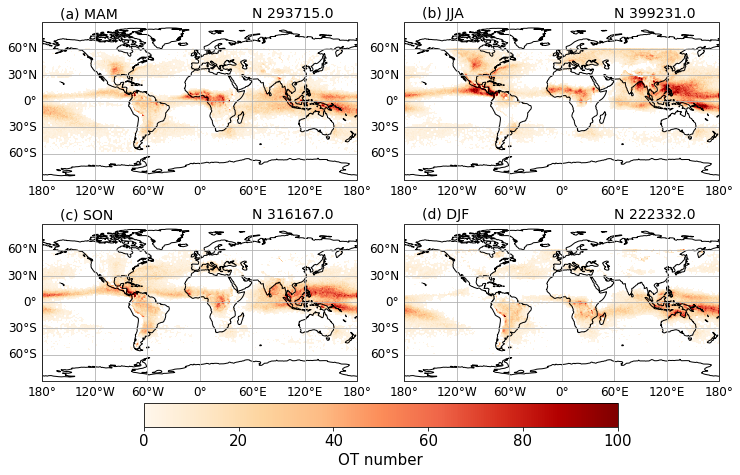

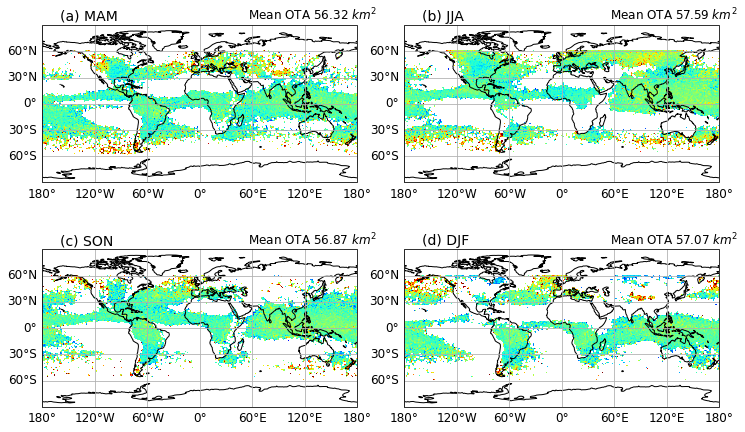

In [10]:
# plot seasonal distributions
#==== to plot seasonal distribution ==========
Season_OTA=np.zeros((360,180,4),'f')
Season_OT_num[:,:,0]=All_OT_num_1[:,:,2]+All_OT_num_1[:,:,3]+All_OT_num_1[:,:,4] #MAM
Season_OT_num[:,:,1]=All_OT_num_1[:,:,5]+All_OT_num_1[:,:,6]+All_OT_num_1[:,:,7] #JJA
Season_OT_num[:,:,2]=All_OT_num_1[:,:,8]+All_OT_num_1[:,:,9]+All_OT_num_1[:,:,10] #SON
Season_OT_num[:,:,3]=All_OT_num_1[:,:,11]+All_OT_num_1[:,:,0]+All_OT_num_1[:,:,1] #DJF

Season_OTA[:,:,0]=All_OTA_1[:,:,2]+All_OTA_1[:,:,3]+All_OTA_1[:,:,4] #MAM
Season_OTA[:,:,1]=All_OTA_1[:,:,5]+All_OTA_1[:,:,6]+All_OTA_1[:,:,7] #JJA
Season_OTA[:,:,2]=All_OTA_1[:,:,8]+All_OTA_1[:,:,9]+All_OTA_1[:,:,10] #SON
Season_OTA[:,:,3]=All_OTA_1[:,:,11]+All_OTA_1[:,:,0]+All_OTA_1[:,:,1] #DJF

print(All_OTA_1.shape,'max season',np.max(Season_OT_num))
tot_season=np.sum(Season_OT_num,axis=0)
tot_season=np.sum(tot_season,axis=0)
tota_season=np.sum(Season_OTA,axis=0)
tota_season=np.sum(tota_season,axis=0)
aveota_season=tota_season/tot_season
print('all season num',tot_season,'season toa',tota_season/tot_season)

fig1,axs =plt.subplots(2,2,figsize=([10,10]),subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
img_extent=(-180,180,-90,90)
data=Season_OT_num[:,:,0]
data=data.T
data=data[::-1]
data[data==0]='nan'
s0=axs[0,0].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=0,vmax=100,cmap='OrRd')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[0,0].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[0,0].text(-160,95,'(a) MAM',fontsize=14)
axs[0,0].text(60,95,'N '+str(tot_season[0]),fontsize=14)

data=Season_OT_num[:,:,1]
data=data.T
data=data[::-1]
data[data==0]='nan'
s1=axs[0,1].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=0,vmax=100,cmap='OrRd')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[0,1].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[0,1].text(-160,95,'(b) JJA',fontsize=14)
axs[0,1].text(60,95,'N '+str(tot_season[1]),fontsize=14)

data=Season_OT_num[:,:,2]
data=data.T
data=data[::-1]
data[data==0]='nan'
s2=axs[1,0].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=0,vmax=100,cmap='OrRd')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[1,0].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[1,0].text(-160,95,'(c) SON',fontsize=14)
axs[1,0].text(60,95,'N '+str(tot_season[2]),fontsize=14)

data=Season_OT_num[:,:,3]
data=data.T
data=data[::-1]
data[data==0]='nan'
s3=axs[1,1].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=0,vmax=100,cmap='OrRd')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[1,1].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[1,1].text(-160,95,'(d) DJF',fontsize=14)
axs[1,1].text(60,95,'N '+str(tot_season[3]),fontsize=14)

fig1.subplots_adjust(bottom=0.28, top=0.90, left=0.01, right=0.95,
                    wspace=0.15, hspace=0.01)

#fig.colorbar(s0, ax=axs[1,:],shrink=0.7)
cb2=plt.colorbar(s3,ax=axs[1,:],orientation='horizontal',shrink=0.7,pad=0.1)
cb2.ax.tick_params(labelsize=15)
cb2.set_label(label='OT number',size=15)
#plt.show()

#== plot seasonal OTA distributions
season_ave_OTA=Season_OTA/Season_OT_num
print('max, min OTA',np.nanmax(season_ave_OTA),np.nanmin(season_ave_OTA))
fig1,axs =plt.subplots(2,2,figsize=([10,10]),subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
data=season_ave_OTA[:,:,0]
data=data.T
data=data[::-1]
data[data==0]='nan'
s0=axs[0,0].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=10,vmax=110,cmap='jet')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[0,0].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[0,0].text(-160,95,'(a) MAM',fontsize=14)
axs[0,0].text(55,95,'Mean OTA '+str(round(aveota_season[0],2))+' $km^2$',fontsize=12)

data=season_ave_OTA[:,:,1]
data=data.T
data=data[::-1]
data[data==0]='nan'
s0=axs[0,1].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=10,vmax=110,cmap='jet')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[0,1].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[0,1].text(-160,95,'(b) JJA',fontsize=14)
axs[0,1].text(55,95,'Mean OTA '+str(round(aveota_season[1],2))+' $km^2$',fontsize=12)

data=season_ave_OTA[:,:,2]
data=data.T
data=data[::-1]
data[data==0]='nan'
s0=axs[1,0].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=10,vmax=110,cmap='jet')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[1,0].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[1,0].text(-160,95,'(c) SON',fontsize=14)
axs[1,0].text(55,95,'Mean OTA '+str(round(aveota_season[2],2))+' $km^2$',fontsize=12)

data=season_ave_OTA[:,:,3]
data=data.T
data=data[::-1]
data[data==0]='nan'
s0=axs[1,1].imshow(data,extent=img_extent,transform=ccrs.PlateCarree(),vmin=10,vmax=110,cmap='jet')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
gl=axs[1,1].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[1,1].text(-160,95,'(d) DJF',fontsize=14)
axs[1,1].text(55,95,'Mean OTA '+str(round(aveota_season[3],2))+' $km^2$',fontsize=12)
fig1.subplots_adjust(bottom=0.28, top=0.90, left=0.01, right=0.95,
                    wspace=0.15, hspace=0.01)
#cb2=fig1.colorbar(s0,ax=axs[:,1],orientation='vertical',shrink=0.7,pad=0.1)

shape of original data (360, 180, 12, 2) (360, 180, 12, 2) (180, 100, 12, 2)
(180, 100, 12, 2) (100, 2)
total day night num 501459.0 729986.0
max day night num 205.0 741.0
ave day night OTA 58.21374030578771 56.18132950494941


/tmp/ipykernel_152734/12520503.py:16: RuntimeWarning: invalid value encountered in true_divide
  day_OTA=All_OTA_dn[:,:,0]/All_OT_num_dn[:,:,0]
/tmp/ipykernel_152734/12520503.py:17: RuntimeWarning: invalid value encountered in true_divide
  night_OTA=All_OTA_dn[:,:,1]/All_OT_num_dn[:,:,1]
/tmp/ipykernel_152734/12520503.py:103: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.26, top=0.9, left=0.01, right=0.95,


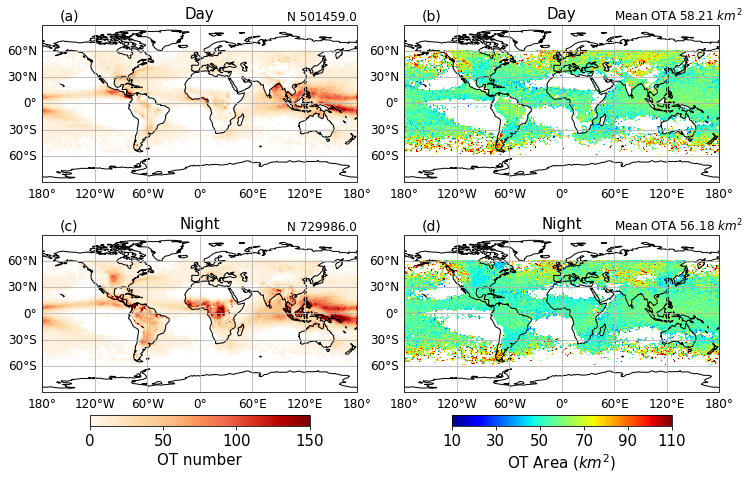

(100,)
(60, 2) (60,)


/tmp/ipykernel_152734/12520503.py:132: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[0].grid(b=True,which='both',linestyle='--')
/tmp/ipykernel_152734/12520503.py:153: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax[1].grid(b=True,which='both',linestyle='--')


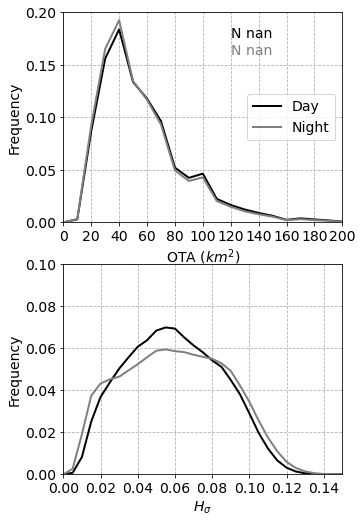

In [11]:
#=== to plot day vs. night 
day_OTnum=np.zeros((360,180),'f')
night_OTnum=np.zeros((360,180),'f')
day_OTA=np.zeros((360,180),'f')
night_OTA=np.zeros((360,180),'f')

print('shape of original data',All_OT_num.shape,All_OTA.shape,All_OTA_pdf.shape)
All_OT_num_dn=np.sum(All_OT_num,axis=2)
All_OTA_dn=np.sum(All_OTA,axis=2)
All_OTA_pdf_dn1=np.sum(All_OTA_pdf,axis=0)
All_OTA_pdf_dn =np.sum(All_OTA_pdf_dn1,axis=1)
print(All_OTA_pdf.shape,All_OTA_pdf_dn.shape)

day_OTnum=All_OT_num_dn[:,:,0]
night_OTnum=All_OT_num_dn[:,:,1]
day_OTA=All_OTA_dn[:,:,0]/All_OT_num_dn[:,:,0]
night_OTA=All_OTA_dn[:,:,1]/All_OT_num_dn[:,:,1]

day_num_str=str(np.sum(day_OTnum))
night_num_str=str(np.sum(night_OTnum))
day_ota_str=np.sum(All_OTA_dn[:,:,0])/np.sum(day_OTnum)
day_ota_str=str(round(day_ota_str,2))
night_ota_str=np.sum(All_OTA_dn[:,:,1])/np.sum(night_OTnum)
night_ota_str=str(round(night_ota_str,2))

print('total day night num',day_num_str,night_num_str)#, np.sum(day_OTnum),np.sum(night_OTnum))
print('max day night num',np.max(day_OTnum),np.max(night_OTnum))
print('ave day night OTA',np.sum(All_OTA_dn[:,:,0])/np.sum(day_OTnum),np.sum(All_OTA_dn[:,:,1])/np.sum(night_OTnum))


fig,axs =plt.subplots(2,2,figsize=([10,10]),subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
img_extent=(-180,180,-90,90)

#ax=plt.axes(projection=ccrs.PlateCarree())
Allnumb1=day_OTnum.T
Allnumb2=Allnumb1[::-1]
Allnumb2[Allnumb2 == 0] = 'nan'

p0=axs[0,0].imshow(Allnumb2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=0,vmax=150,cmap='OrRd')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].set_title('Day',fontsize=15)
axs[0,0].text(-160,95,'(a)',fontsize=14)
axs[0,0].text(100,95,'N '+day_num_str,fontsize=12)
gl=axs[0,0].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False

ave_OTA_1=day_OTA.T
ave_OTA_2=ave_OTA_1[::-1]
p1=axs[0,1].imshow(ave_OTA_2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=10,vmax=110,cmap='jet')
#p=axs[0,1].contourf(ave_OTA_2,[10,20,40,60,70,80,90,100,150,200,250,300],extent=img_extent,transform=ccrs.PlateCarree(),\
#                    cmap='tab20c')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].set_title('Day',fontsize=15)
axs[0,1].text(-160,95,'(b)',fontsize=14)
axs[0,1].text(60,95,'Mean OTA '+day_ota_str+' $km^2$',fontsize=12)
gl=axs[0,1].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False


#ax=plt.axes(projection=ccrs.PlateCarree())
Allnumb1=night_OTnum.T
Allnumb2=Allnumb1[::-1]
Allnumb2[Allnumb2 == 0] = 'nan'
#index=np.where(Allnumb2 == 0)
#index=index[0]
#Allnumb2[index]=np.nan

p2=axs[1,0].imshow(Allnumb2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=0,vmax=150,cmap='OrRd')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].set_title('Night',fontsize=15)
gl=axs[1,0].gridlines(draw_labels=True)
axs[1,0].text(-160,95,'(c)',fontsize=14)
axs[1,0].text(100,95,'N '+night_num_str,fontsize=12)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False

ave_OTA_1=night_OTA.T
ave_OTA_2=ave_OTA_1[::-1]
p3=axs[1,1].imshow(ave_OTA_2,extent=img_extent,transform=ccrs.PlateCarree(),vmin=10,vmax=110,cmap='jet')
#p=axs[0,1].contourf(ave_OTA_2,[10,20,40,60,70,80,90,100,150,200,250,300],extent=img_extent,transform=ccrs.PlateCarree(),\
#                    cmap='tab20c')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].set_title('Night',fontsize=15)
gl=axs[1,1].gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False
axs[1,1].text(-160,95,'(d)',fontsize=14)
axs[1,1].text(60,95,'Mean OTA '+night_ota_str+' $km^2$',fontsize=12)
#axs[1,1].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
#lat_formatter = cticker.LatitudeFormatter()
#axs[1,1].yaxis.set_major_formatter(lat_formatter)

fig.subplots_adjust(bottom=0.26, top=0.9, left=0.01, right=0.95,
                    wspace=0.15, hspace=0.01)

cb1=fig.colorbar(p2,ax=axs[1,0],orientation='horizontal',shrink=0.7,pad=0.1)
cb1.ax.tick_params(labelsize=15)
cb1.set_label(label='OT number',size=15)

cb2=fig.colorbar(p3,ax=axs[1,1],orientation='horizontal',shrink=0.7,pad=0.1,ticks=[10, 30, 50,70,90,110])
cb2.ax.tick_params(labelsize=15)
cb2.set_label(label='OT Area ($km^2$)',size=15)
plt.show()

#=== to plot pdf of OTA 
fig,ax =plt.subplots(2,1,figsize=([5,8.5]))
x_ota=np.arange(100)*10
fontsz=14
All_OTA_pdf2_day=All_OTA_pdf_dn[:,0]
All_OTA_pdf2_night=All_OTA_pdf_dn[:,1]
print(All_OTA_pdf2_day.shape)
f0=ax[0].plot(x_ota,All_OTA_pdf2_day/float(np.sum(All_OTA_pdf2_day)),'black',linewidth=2)
f1=ax[0].plot(x_ota,All_OTA_pdf2_night/float(np.sum(All_OTA_pdf2_night)),'grey',linewidth=2)
ax[0].set_xlim([0,200])
ax[0].set_ylim([0,0.2])
ax[0].set_xlabel('OTA ($km^2$)',size=fontsz)
ax[0].set_ylabel('Frequency',size=fontsz)
ax[0].set_xticks([0,20,40,60,80,100,120,140,160,180,200])
ax[0].tick_params(labelsize=fontsz)
#ax.xaxis.set_major_locator(AutoMinorLocator(11))
#ax.grid(b=True,linestyle='--')
ax[0].grid(b=True,which='both',linestyle='--')
ax[0].text(120,0.176,'N '+ str(np.sum(day_OTnum)) ,fontsize=fontsz,color='black')
ax[0].text(120,0.160,'N '+ str(np.sum(night_OTnum)),fontsize=fontsz,color='grey')
ax[0].legend(['Day','Night'],loc=7,fontsize=fontsz)
# to plot heterogeneity
hetero_bin=0.005
heterogeneity=np.arange(Nhetero)*hetero_bin
All_hetero_pdf1=np.sum(All_hetero_pdf,axis=0)
All_hetero_pdf_dn=np.sum(All_hetero_pdf1,axis=1)
All_hetero_pdf_day=All_hetero_pdf_dn[:,0]
All_hetero_pdf_night=All_hetero_pdf_dn[:,1]
print(All_hetero_pdf_dn.shape,All_hetero_pdf_day.shape)
f0=ax[1].plot(heterogeneity,All_hetero_pdf_day/float(np.sum(All_hetero_pdf_day)),'black',linewidth=2)
f1=ax[1].plot(heterogeneity,All_hetero_pdf_night/float(np.sum(All_hetero_pdf_night)),'grey',linewidth=2)
ax[1].set_xlim([0,0.15])
ax[1].set_ylim([0,0.10])
ax[1].set_xlabel('$H_\sigma$',size=fontsz)
ax[1].set_ylabel('Frequency',size=fontsz)
ax[1].set_xticks([0,0.02,0.04,0.06,0.08,0.1,0.12,0.14])
#ax[1].set_xticks([0,20,40,60,80,100,120,140,160,180,2])
ax[1].tick_params(labelsize=fontsz)
ax[1].grid(b=True,which='both',linestyle='--')

plt.show()
